# <center>Machine Learning Project</center>

** **
## <center>*01 - Exploratory Data Analysis & Preprocessing*</center>

** **

The members of the `team` are:
- Ana Farinha - 20211514
- Francisco Capontes - 20211692
- Maria Cruz - 20230760
- Sofia Gomes - 20240848
- Tahiya Laboni - 20240943


## <span style="color:salmon"> Description of the project  </span> 

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, volunteer firefighters, volunteer ambulance workers, and volunteer civil defence workers’ benefits. As the regulating authority, the WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury. Since 2000, the WCB has assembled and reviewed more than 5 million claims.

However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received.

## <span style="color:salmon"> Table of Contents </span>

1. [Importing Libraries & Data](#1.-importing-libraries--data) <br><br>  

2. [Exploratory Data Analysis](#2.-explore-data-analysis) <br>  
   2.1 [Initial Exploration](#2.1-initial-exploration) <br>  
   2.2 [Duplicates](#2.2-duplicates) <br>  
   2.3 [Missing Values](#2.3-missing-values) <br>  
   2.4 [Target Distribution](#2.4-target-distribution) <br>  
   2.5 [Numerical Variables](#2.5-numerical-variables) <br>  
   2.6 [Categorical Variables](#2.6-categorical-variables) <br>  
   2.7 [Date Variables](#2.7-date-variables) <br><br>  

3. [Clean and Pre-processing](#3.-clean-and-pre-processing) <br>  
   3.1 [Data Types](#3.1-data-types) <br>  
   3.2 [Incoherencies](#3.2-incoherencies) <br>  
   3.3 [Handling Missing Values](#3.3-handling-missing-values) <br>  
   3.4 [Removing Outliers](#3.4-removing-outliers) <br>  
   3.5 [Numerical Variables](#3.5.1-numerical-variables) <br>  
   3.6 [Categorical Variables](#3.5.2-categorical-variables) <br><br>  

4. [Other Visualizations](#4.-other-visualizations) <br> <br> 

5. [Feature Selection](#5.-feature-selection) <br><br>  

6. [Export Dataset](#6.-export-dataset) <br><br>  



## <span style="color:salmon"> 1. Import Libraries & Data  </span> 

In [1433]:
import pandas as pd
import numpy as np
from scipy import stats

# Missing Values
import missingno as msno

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Encoding libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from utils import *

In [1434]:
df = pd.read_csv('./project_data/train_data.csv')
df

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/1657859846.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./project_data/train_data.csv')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <span style="color:salmon"> 2. Exploratory Data Analysis  </span> 

#### <span style="color:salmon"> 2.1 Initial Exploration </span> 

In order to better understand the dataset we can use some functions, like the following:

1. See the first ten lines 

In [1439]:
df.head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
6,2019-12-28,48.0,N,2020-01-01,N,0.00,1971.0,2019-12-31,NaN,LM INSURANCE CORP,...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0
7,2019-12-30,33.0,N,2020-01-01,N,0.00,1986.0,2019-12-31,2020-03-04,STATE INSURANCE FUND,...,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",38.0,SHOULDER(S),10305,0.0,Not Work Related,6.0
8,2019-12-23,55.0,N,2020-01-01,N,0.00,1964.0,2020-01-01,NaN,"ROCHESTER, UNIVERSITY OF",...,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",60.0,LUNGS,14620,0.0,Not Work Related,6.0
9,2019-12-29,20.0,N,2020-01-01,N,225.00,NaN,2019-12-31,NaN,LM INSURANCE CORP,...,81.0,"STRUCK OR INJURED, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",14.0,EYE(S),11231,0.0,Not Work Related,6.0


2. Get information about the data types in each column, non-null values and memory usage

In [1441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

3. Get the shape of the dataset

In [1443]:
df.shape

(593471, 33)

4. Check each column's data type

In [1445]:
# Check each columns' original data type

data_types = df.dtypes

sorted_columns = {}

for dtype in data_types.unique():
    sorted_columns[str(dtype)] = df.columns[df.dtypes == dtype].tolist()

# Display the columns grouped by their types
for dtype, columns in sorted(sorted_columns.items()):
    print(f"Data type: {dtype}")
    print(f"Columns: {columns}\n")

Data type: float64
Columns: ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Industry Code', 'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents']

Data type: int64
Columns: ['Claim Identifier']

Data type: object
Columns: ['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type', 'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Zip Code', 'WCB Decision']



5. Check each row's length in the 'Claim Identifier' column

In [1447]:
df['Claim Identifier'].apply(lambda x: len(str(x))).value_counts()

# There are IDs with different lenghts, which isn't expected from an identifier.

Claim Identifier
7    574026
9     19445
Name: count, dtype: int64

#### <span style="color:salmon"> 2.2 Duplicates </span> 

This section is divided into two main parts: checking for duplicated `Claim Indentifier` and searching for duplicated rows.

1.  Check for duplicated IDs

This dataset contains a variable called `Claim Identifier` which should be unique to each injuty claim / row. 

In [1451]:
# Search for duplicated 'Claim Identifier'
df['Claim Identifier'].duplicated().sum()

1

Above, it can be verified the existence of two rows with the same `Claim Identifier`. To better understand why that happened, it can be seen below the rows with the same IDs.

In [1453]:
# Check for duplicated values in 'Claim Identifier'
duplicated_claims = df['Claim Identifier'].duplicated(keep=False)

df[duplicated_claims]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
257901,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526445,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The rows are almost empty so we decided to drop these two. Afterwards, the possibility of existing similar almost empty rows will be explored.

In [1455]:
df.drop_duplicates(subset='Claim Identifier', keep=False, inplace=True)

2. Search for duplicated rows

In [1457]:
print(f'There are {df.duplicated().sum()} duplicated rows, which represent {(18349/len(df) * 100):.1f}% of the dataset')

There are 0 duplicated rows, which represent 3.1% of the dataset


Before deciding what to do with these duplicated rows, lets explore them a bit.

In [1459]:
df[df.duplicated(keep=False)].describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Above are the descriptive statistics of the duplicated rows.  
We can see that the columns have missing values. Because they do not add information, we decided to remove them.

In [1461]:
df = df.drop_duplicates(keep=False)

#### <span style="color:salmon"> 2.3 Missing Values </span> 

The method `.info()` revelead that several variables contain missing values.  

In [1464]:
print(f"Total number of columns: {df.shape[1]}")
print(f"Number of columns with missing values: {(df.isnull().sum() > 0).sum()}")

Total number of columns: 33
Number of columns with missing values: 31


In [1465]:
# Check for the total number of missing values per column

df.isnull().sum()

# 'OIICS Nature of Injury Description' is a null variable
# 'Assembly Date' and 'Claim Identifier' are the only variables that don't contain missing values at all

Accident Date                          23132
Age at Injury                          19443
Alternative Dispute Resolution         19443
Assembly Date                              0
Attorney/Representative                19443
Average Weekly Wage                    48094
Birth Year                             48521
C-2 Date                               34003
C-3 Date                              406224
Carrier Name                           19443
Carrier Type                           19443
Claim Identifier                           0
Claim Injury Type                      19443
County of Injury                       19443
COVID-19 Indicator                     19443
District Name                          19443
First Hearing Date                    442671
Gender                                 19443
IME-4 Count                           460666
Industry Code                          29401
Industry Code Description              29401
Medical Fee Region                     19443
OIICS Natu

In [1466]:
# Show the rows which 'Claim Identifier' is composed of 9 characters,
# because most values have 7 characters

odd_id = df[df['Claim Identifier'].apply(lambda x: len(str(x)) == 9)]

odd_id

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593465,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1467]:
# Count the number of rows with no target value

df['Claim Injury Type'].isnull().sum()

19443

In [1468]:
# Count the number of rows with no assigned age

df['Age at Injury'].isnull().sum()

19443

In [1469]:
# Drop the rows in 'odd_id'

df = df.drop(odd_id.index)

The rows with no target value are the same which `Claim Identifier` is composed of 9 characters,  
and also the same rows that do not have an assigned age.  

These rows are completely empty in all the columns besides `Assembly Date`, so they were dropped.

In [1471]:
# Check again for the number of columns with missing values

print(f"Number of columns with missing values: {(df.isnull().sum() > 0).sum()}")

Number of columns with missing values: 17


In [1472]:
# Display the columns with missing values

df.columns[df.isnull().sum() > 0]

Index(['Accident Date', 'Average Weekly Wage', 'Birth Year', 'C-2 Date',
       'C-3 Date', 'First Hearing Date', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code'],
      dtype='object')

In [1473]:
# Display the percentage of missing values per column

missing_values = df.isnull().sum() / len(df) * 100

print(missing_values[missing_values > 0].sort_values(ascending=False))

OIICS Nature of Injury Description    100.000000
IME-4 Count                            76.864637
First Hearing Date                     73.729761
C-3 Date                               67.380397
Birth Year                              5.065624
Average Weekly Wage                     4.991237
Zip Code                                4.988798
WCIO Part Of Body Code                  2.975823
WCIO Part Of Body Description           2.975823
WCIO Nature of Injury Code              2.727577
WCIO Nature of Injury Description       2.727577
WCIO Cause of Injury Code               2.724615
WCIO Cause of Injury Description        2.724615
C-2 Date                                2.536470
Industry Code Description               1.734765
Industry Code                           1.734765
Accident Date                           0.642654
dtype: float64


* Minor percentage:
Accident Date, Average Weekly Wage, Birth Year, C-2 Date, Industry Code, Industry Code Description, Zip Code and all the 'WCIO' columns

* Very high percentage:
C-3 Date, First Hearing Date, IME-4 Count and OIICS Nature of Injury Description

In [1475]:
print(df['OIICS Nature of Injury Description'].unique())

[nan]


In [1476]:
df = df.drop(columns=['OIICS Nature of Injury Description'])

We decided to remove the column 'OIICS Nature of Injury Description', because 100% of it contains missing values.

In [1478]:
# Before making decisions, check which variables can have NAN's according to the project description

In [1479]:
# List of columns to convert to datetime
convert_date = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

# Loop through the columns and convert to datetime
for col in convert_date:
    # Convert to datetime without specifying format (let pandas infer the format)
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Check if the data type conversion was properly done
print("Data types after conversion:")
print(df[convert_date].dtypes)

Data types after conversion:
Accident Date         datetime64[ns]
Assembly Date         datetime64[ns]
C-2 Date              datetime64[ns]
C-3 Date              datetime64[ns]
First Hearing Date    datetime64[ns]
dtype: object


In [1480]:
# (Don't forget to remove the time from the date)

In [1481]:
df['Accident Date'].head()

0   2019-12-30
1   2019-08-30
2   2019-12-06
4   2019-12-30
5   2019-12-26
Name: Accident Date, dtype: datetime64[ns]

In [1482]:
convert_int = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'WCIO Nature of Injury Code', 'Industry Code', 'WCIO Cause of Injury Code',
               'WCIO Part Of Body Code', 'Number of Dependents']

# Loop through the columns
for col in convert_int:
    # Convert the columns with errors coerced to NaN, then cast to nullable Int64
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

# Check if the conversion was properly done
print(df[convert_int].dtypes)

Age at Injury                 Int64
Birth Year                    Int64
IME-4 Count                   Int64
WCIO Nature of Injury Code    Int64
Industry Code                 Int64
WCIO Cause of Injury Code     Int64
WCIO Part Of Body Code        Int64
Number of Dependents          Int64
dtype: object


In [1483]:
convert_float = ['Average Weekly Wage']

# Loop through the columns
for col in convert_float:
    # Convert the columns with errors coerced to NaN, then cast to float64
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')

# Check if the conversion was properly done
print(df[convert_float].dtypes)

Average Weekly Wage    float64
dtype: object


In [1484]:
# Extract the year of the accident
df['Year of Accident'] = df['Accident Date'].dt.year

# Calculate 'Birth Year' where it is missing
df['Birth Year'] = df['Birth Year'].fillna(df['Year of Accident'] - df['Age at Injury'])

# Drop 'Year of Accident' as it is only used for this calculation
df.drop(columns=['Year of Accident'], inplace=True)

# Display the 'Birth Year' column to verify imputation
print(df['Birth Year'])

0         1988
1         1973
2         1979
4         1958
5         1952
          ... 
593451    1987
593455    1989
593456    1961
593457    1998
593467    1950
Name: Birth Year, Length: 574026, dtype: Int64


In [1485]:
# Check the number of missing values in 'Birth Year'

df['Birth Year'].isnull().sum()

176

In [1486]:
# Display the rows with missing values in 'Birth Year'

missing_birth = df[df['Birth Year'].isnull()]

missing_birth

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
2134,NaT,0,N,2020-01-06,Y,0.0,<NA>,2020-03-09,2019-12-31,"MACY'S, INC.",...,98,"CUMULATIVE, NOC",52,STRAIN OR TEAR,22,DISC,10456,0.0,Not Work Related,6
5227,NaT,0,N,2020-01-10,Y,0.0,<NA>,2020-02-19,2020-01-07,A I U INSURANCE COMPANY,...,52,CONTINUAL NOISE,72,LOSS OF HEARING,13,EAR(S),11354,0.0,Not Work Related,2
6167,NaT,0,N,2020-01-13,Y,0.0,<NA>,2020-02-10,2020-01-07,AMERICAN ZURICH INSURANCE CO,...,99,"OTHER - MISCELLANEOUS, NOC",59,"ALL OTHER SPECIFIC INJURIES, NOC",42,LOWER BACK AREA,11214,0.0,Not Work Related,1
6250,NaT,0,N,2020-01-13,Y,0.0,<NA>,2021-04-13,2020-01-08,CHUBB INDEMNITY INS CO,...,98,"CUMULATIVE, NOC",31,HEARING LOSS OR IMPAIRMENT,13,EAR(S),11730,0.0,Not Work Related,2
12577,NaT,0,N,2020-01-22,Y,0.0,<NA>,2020-01-30,2020-01-16,NYC TRANSIT AUTHORITY,...,99,"OTHER - MISCELLANEOUS, NOC",31,HEARING LOSS OR IMPAIRMENT,13,EAR(S),11236,0.0,Not Work Related,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571568,NaT,0,N,2022-11-18,Y,0.0,<NA>,NaT,2022-11-09,TOWN OF AMHERST,...,<NA>,NaN,<NA>,NaN,<NA>,NaN,14221,0.0,Not Work Related,5
571940,NaT,0,N,2022-11-21,Y,NaN,<NA>,2022-11-30,2022-10-04,NYC TRANSIT AUTHORITY,...,99,"OTHER - MISCELLANEOUS, NOC",31,HEARING LOSS OR IMPAIRMENT,13,EAR(S),10003,0.0,Not Work Related,6
582090,NaT,0,N,2022-12-09,Y,0.0,<NA>,NaT,2022-12-02,LIBERTY INSURANCE CORPORATION,...,<NA>,NaN,<NA>,NaN,<NA>,NaN,14092,0.0,Not Work Related,1
582128,NaT,0,N,2022-12-09,Y,0.0,<NA>,NaT,2022-12-05,ZURICH AMERICAN INSURANCE CO,...,<NA>,NaN,<NA>,NaN,<NA>,NaN,11203,0.0,Not Work Related,4


In [1487]:
df['Accident Date'].isnull().sum()

3689

And also to remove rows

In [1489]:
df = df[df[['Accident Date']].any(axis=1)]

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/1260868252.py:1: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  df = df[df[['Accident Date']].any(axis=1)]


In [1490]:
# Check again for the number of columns with missing values

print(f"Number of columns with missing values: {(df.isnull().sum() > 0).sum()}")

Number of columns with missing values: 14


**Heatmap of Missing Values**

The heatmap shows correlations between missing values in different columns, revealing if missingness in one column is associated with missingness in another.

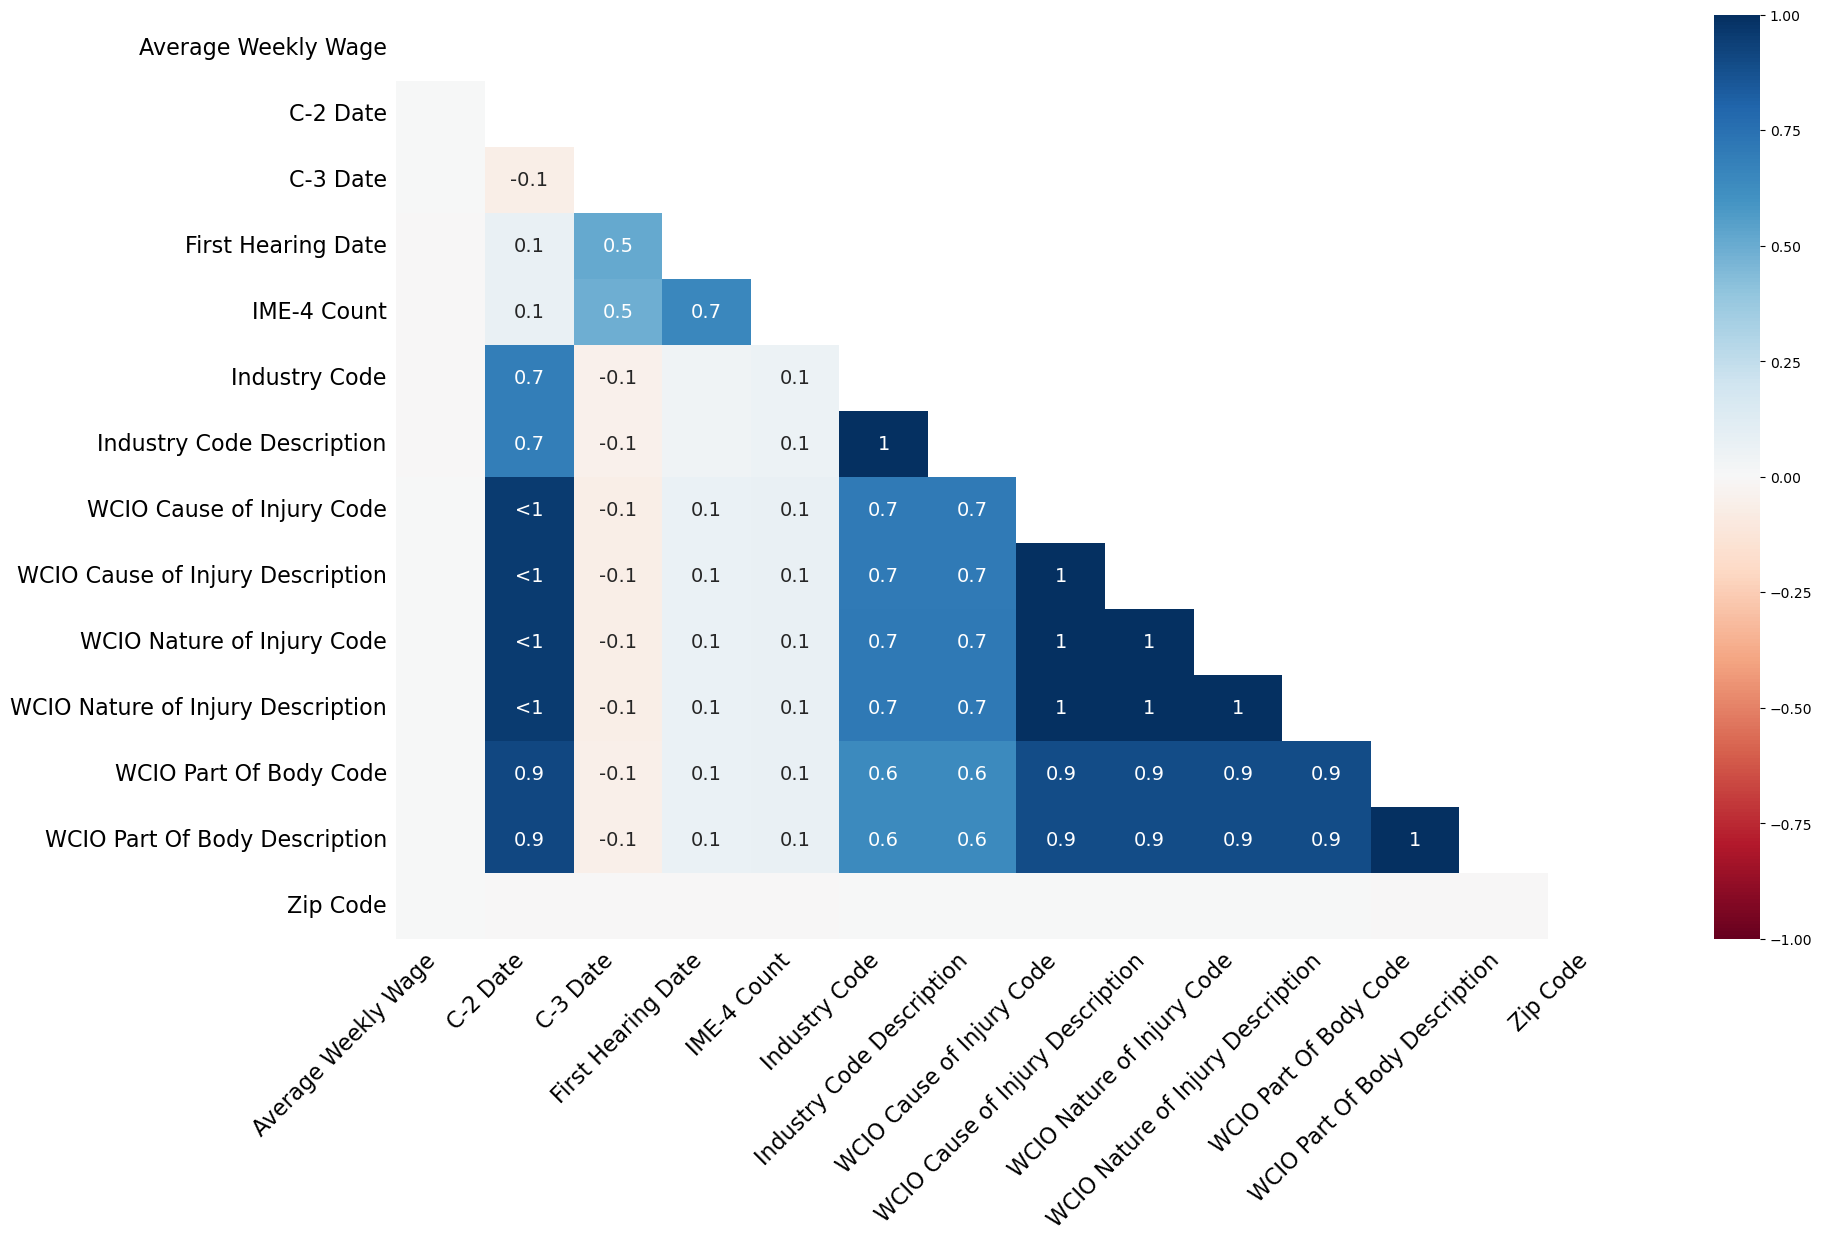

In [1492]:
msno.heatmap(df)
plt.show()

Conclusions about this heatmap:
* A high correlation 0.9, suggesting that when one is missing, the other often is too, like in WCIO
* A correlation 0.5 to 0.7 imply a weaker but still noteworthy relationship, like in WCIO and Industry code
* A correlation close to zero or negative imply little to no relationship, suggesting that missingness in one column does not predict missingness in the other, like in Accident date, average weekly wage and others

**Dendogram of Missing Values**

The dendrogram groups columns with similar patterns of missing values. It’s useful for identifying clusters of columns that have related missing data patterns, which might be caused by specific conditions or categories.

<Figure size 1200x600 with 0 Axes>

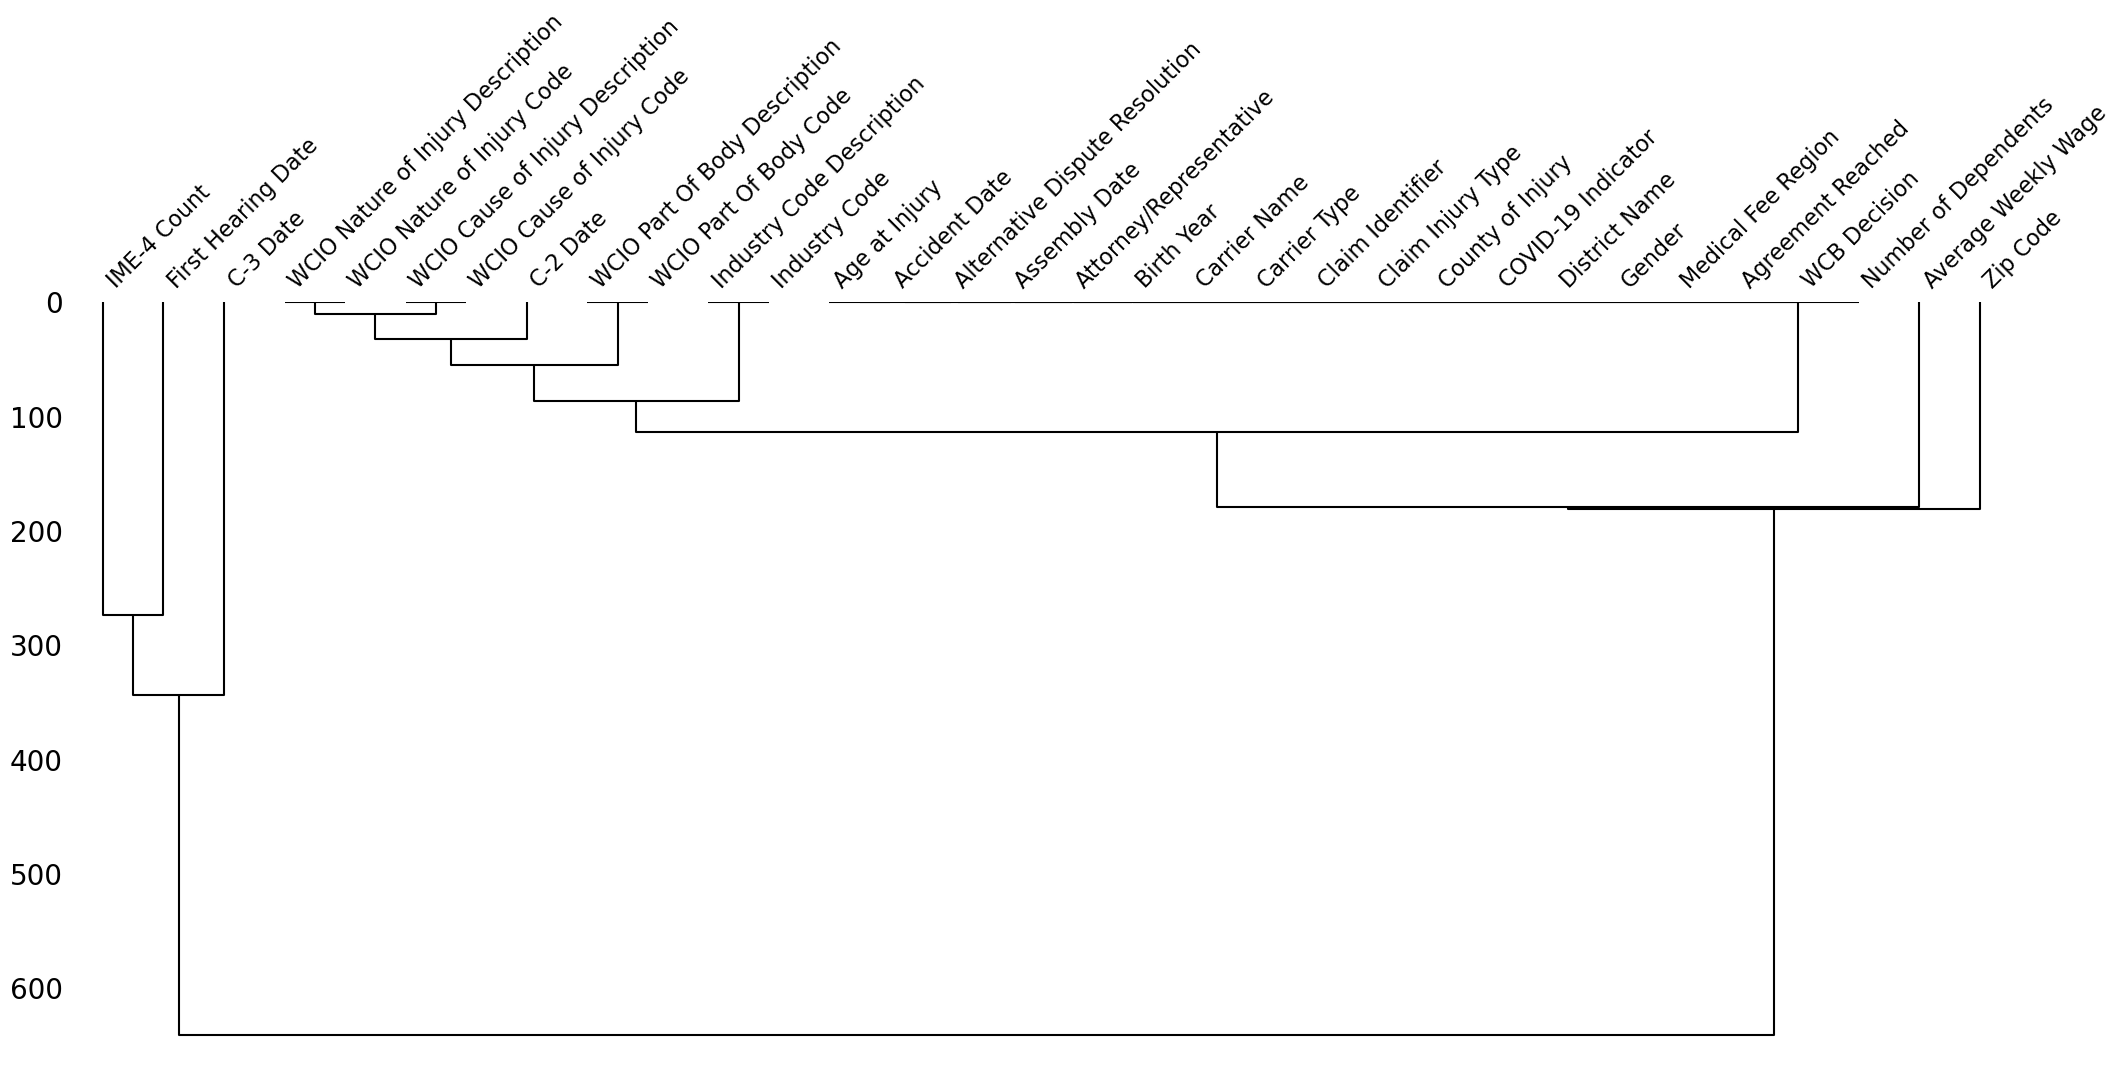

In [1495]:
plt.figure(figsize=(12, 6))
msno.dendrogram(df)
plt.show()

#### <span style="color:yellow"> MELHORAR CONCLUSOES </span> 

Conclusions about dendrogram:
* We can divide this in two parts:
    1. IME-4 count, first hearing date, C-3 Date
    2. remaining columns

In [1498]:
# Check df length
df.shape

(570337, 32)

After the complete treatment of duplicate and missing values, `Claim Identifier` was set as the index.

In [1500]:
df = df.set_index('Claim Identifier')

#### <span style="color:salmon"> 2.4 Target Distribution </span> 

To get to know our data, we started by exploring the target variable `Claim Injury Type`. To do so, we created a freaquency bar chart.

<Axes: title={'center': 'Frequency of Claim Injury Type'}, xlabel='Claim Injury Type', ylabel='count'>

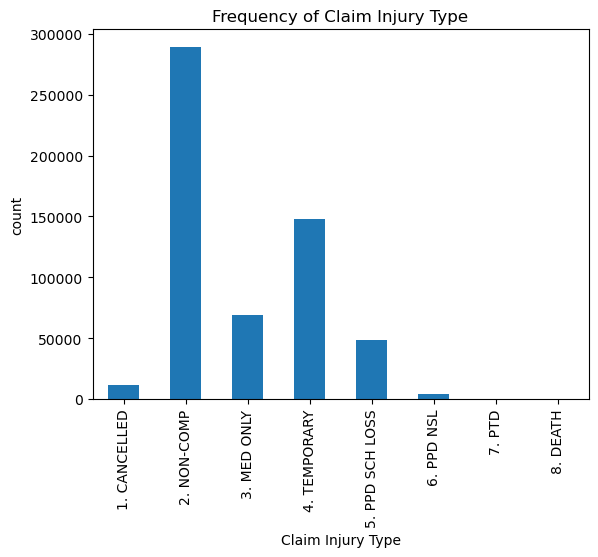

In [1503]:
# Using value_counts to get counts per state and plotting
df['Claim Injury Type'].value_counts().sort_index().plot(kind='bar', xlabel='Claim Injury Type', ylabel='count', title='Frequency of Claim Injury Type')

Conclusions about the frequency of Claim Injury type:
* There is a large discrepancy between the values
* The most frequent is NON-COMP
* The one with the lowest frequency is PTD and DEATH

#### <span style="color:salmon"> 2.5 Numerical Variables </span> 

Numerical variables represent measurable quantities and can be analyzed mathematically. <br>  
The numerical variables that exist in this dataset are:

In [1507]:
numerical_features = [
    'Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents'
]

In [1508]:
numerical_df = df[numerical_features]
numerical_df

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents
Claim Identifier,,,,,
5393875,31,0.00,1988,<NA>,1
5393091,46,1745.93,1973,4,4
5393889,40,1434.80,1979,<NA>,6
5393887,61,NaN,1958,<NA>,1
5393863,67,0.00,1952,<NA>,5
...,...,...,...,...,...
6165265,35,0.00,1987,<NA>,4
6165285,33,0.00,1989,<NA>,6
6165506,61,991.08,1961,1,3


Show some statistics about the numerical_df:

In [1510]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,570337.0,42.38667,13.89296,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,541881.0,494.003367,6112.382725,0.0,0.0,0.0,846.82,2828079.0
Birth Year,570337.0,1892.044917,403.236313,0.0,1965.0,1977.0,1989.0,2022.0
IME-4 Count,132351.0,3.211959,2.835096,1.0,1.0,2.0,4.0,73.0
Number of Dependents,570337.0,3.006507,2.000993,0.0,1.0,3.0,5.0,6.0



- **Age at Injury**: 
    - Mean age is 42.11 years with a standard deviation of 14.26
    - The ages range from 0 to 117 years, with the 25th percentile at 31, the median at 42, and the 75th percentile at 54
    - 75% of the people has 54 age at injury
- **Average Weekly Wage**: 
    - Mean weekly wage is 491.09 with a very high standard deviation of 6092.92
    - The wages range from 0 to a maximum of 2,828,079
    - 75% have an average weekly wage of 841
- **Birth Year**: 
    - The mean birth year is around 1886.77 with a standard deviation of 414.64
    - The birth years range from 0 to 2018
- **IME-4 Count**: 
    - Mean count is 3.21 with a standard deviation of 2.83
- **Number of Dependents**: 
    - Mean is 3 and the standard deviation is 2
    - The range of number of dependencies is 0 to 6



For a better understanding of the numerical_features, we did some plots:

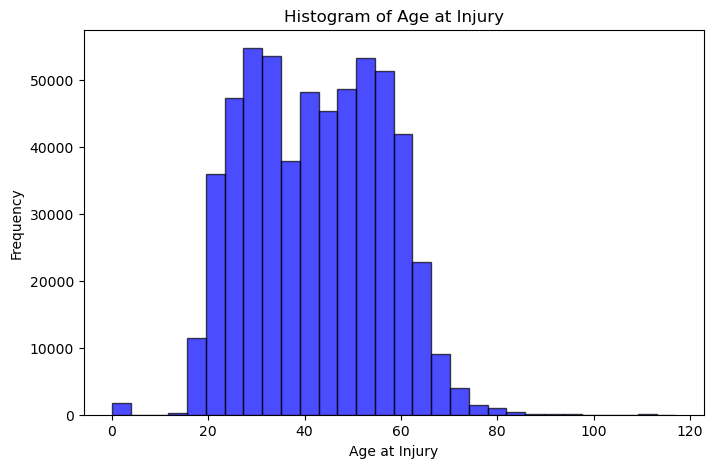

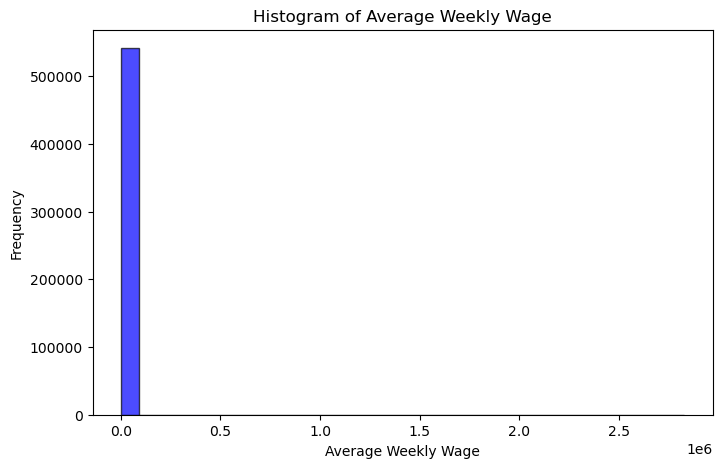

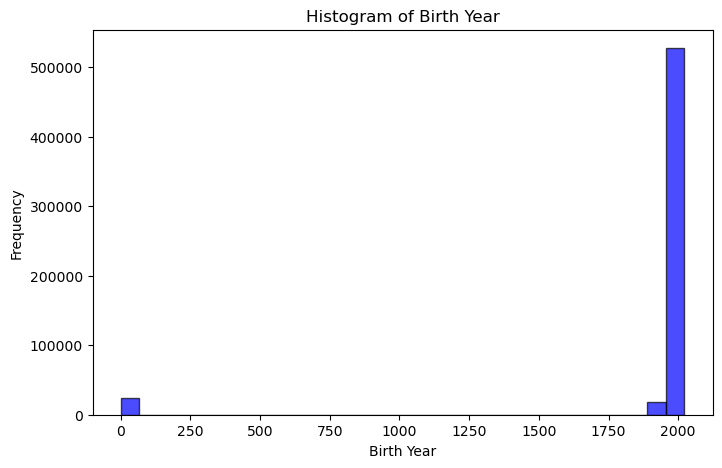

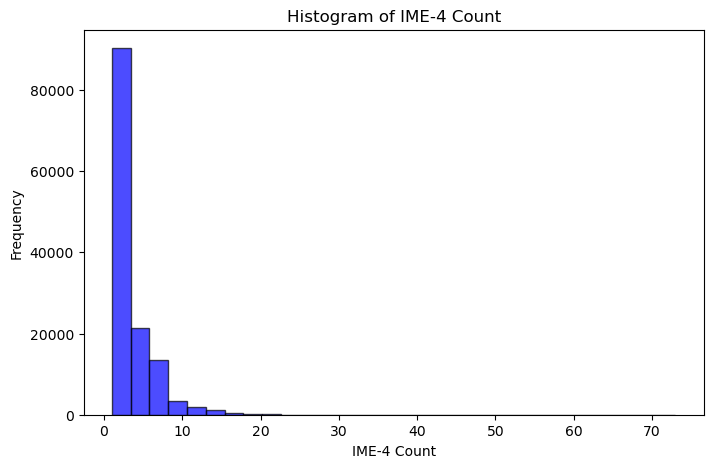

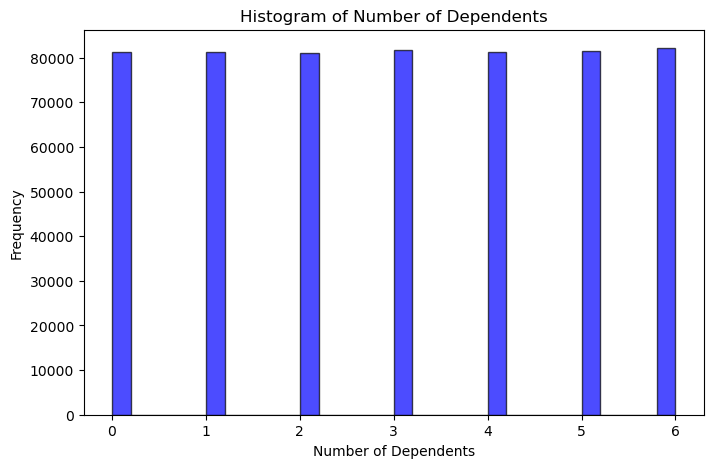

In [1513]:
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 5*len(numerical_features)))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)
    
for idx, feature in enumerate(numerical_features):
    # Histogram with KDE
    sns.histplot(data=numerical_df, x=feature, kde=True, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Distribution of {feature}')
    axes[idx, 0].set_xlabel(feature)
        
    # Box plot
    sns.boxplot(data=numerical_df, y=feature, ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Box Plot of {feature}')
    
plt.tight_layout()
plt.show()

We use Box Plots to identify potential outliers:

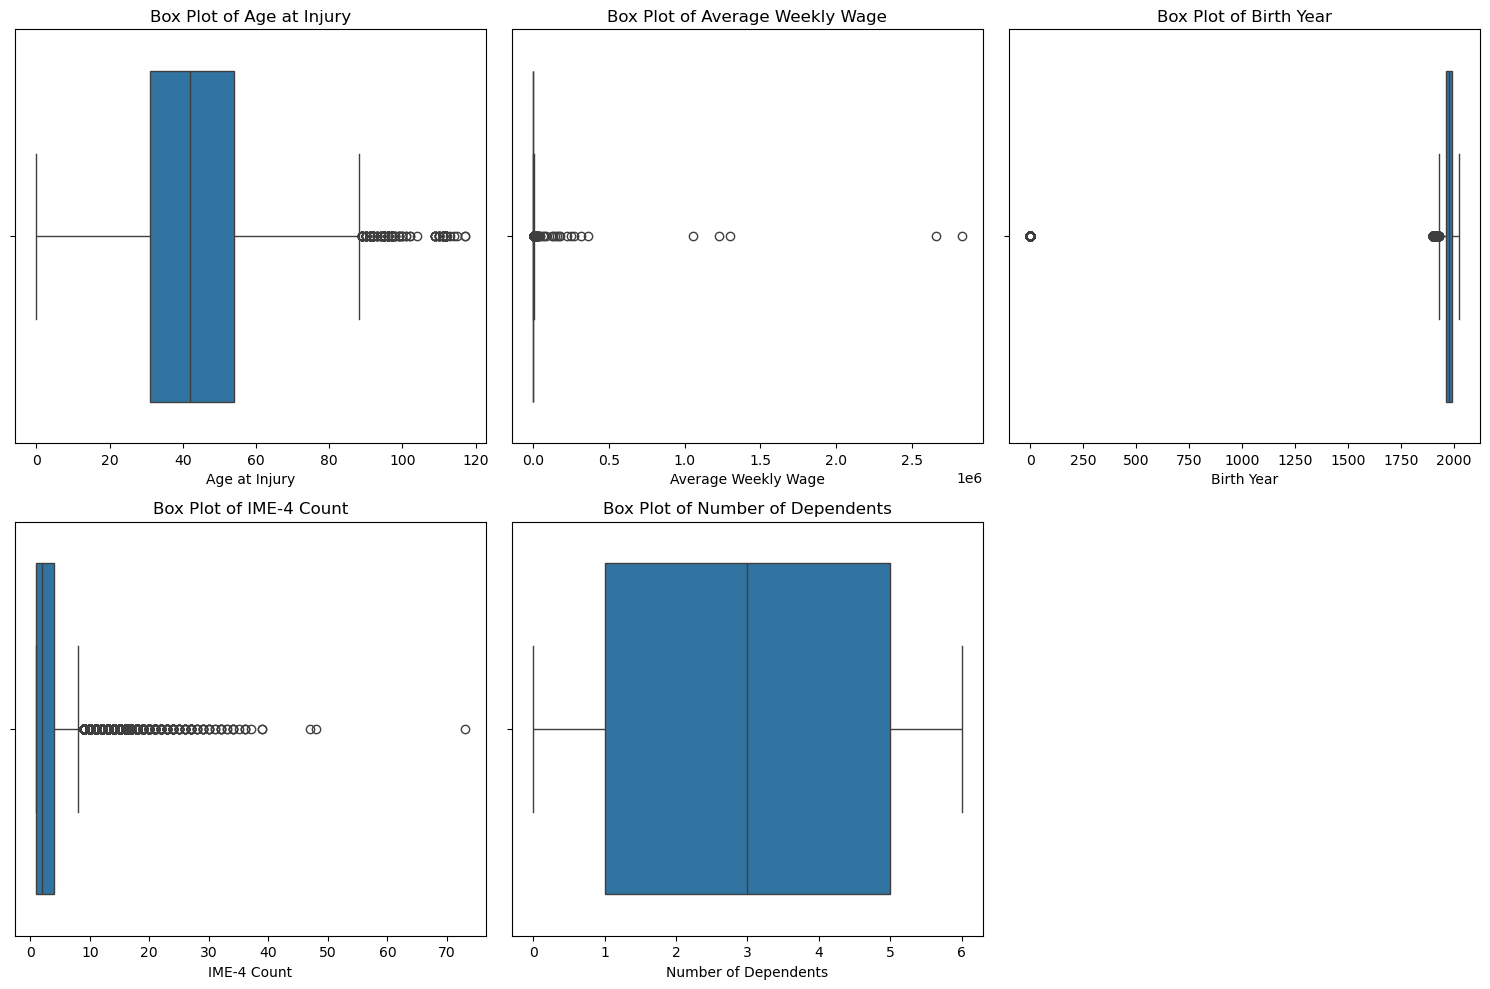

In [1515]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

#### <span style="color:salmon"> 2.6 Categorical Variables </span> 

Categorical variables represent characteristics or qualities that group data into distinct categories or labels. <br>  
In this dataset, the categorical variables are:

In [1518]:
categorical_features = [
    'Alternative Dispute Resolution', 'Attorney/Representative',
    'Carrier Name',  'Carrier Type', 'County of Injury',
    'COVID-19 Indicator',  'District Name', 'Gender', 'Industry Code',
    'Industry Code Description',  'Medical Fee Region',  'WCIO Cause of Injury Code',
    'WCIO Cause of Injury Description',  'WCIO Nature of Injury Code',
    'WCIO Nature of Injury Description',  'WCIO Part Of Body Code',
    'WCIO Part Of Body Description',  'Zip Code', 'Agreement Reached',
    'WCB Decision', 'Claim Injury Type'
]

In [1519]:
categorical_df = df[categorical_features]
categorical_df

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Industry Code Description,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,N,N,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,ST. LAWRENCE,N,SYRACUSE,M,44,RETAIL TRADE,...,27,FROM LIQUID OR GREASE SPILLS,10,CONTUSION,62,BUTTOCKS,13662,0.0,Not Work Related,2. NON-COMP
5393091,N,Y,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,WYOMING,N,ROCHESTER,F,23,CONSTRUCTION,...,97,REPETITIVE MOTION,49,SPRAIN OR TEAR,38,SHOULDER(S),14569,1.0,Not Work Related,4. TEMPORARY
5393889,N,N,INDEMNITY INSURANCE CO OF,1A. PRIVATE,ORANGE,N,ALBANY,M,56,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,...,79,OBJECT BEING LIFTED OR HANDLED,7,CONCUSSION,10,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,4. TEMPORARY
5393887,N,N,STATE INSURANCE FUND,2A. SIF,DUTCHESS,N,ALBANY,M,62,HEALTH CARE AND SOCIAL ASSISTANCE,...,16,"HAND TOOL, UTENSIL; NOT POWERED",43,PUNCTURE,36,FINGER(S),12603,0.0,Not Work Related,2. NON-COMP
5393863,N,N,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,SUFFOLK,N,HAUPPAUGE,M,44,RETAIL TRADE,...,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,38,SHOULDER(S),11772,0.0,Not Work Related,3. MED ONLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165265,N,N,STATE INSURANCE FUND,2A. SIF,BRONX,N,NYC,M,56,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,...,45,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10,CONTUSION,42,LOWER BACK AREA,10467,0.0,Not Work Related,2. NON-COMP
6165285,N,N,WESCO INSURANCE CO,1A. PRIVATE,NASSAU,N,NYC,M,62,HEALTH CARE AND SOCIAL ASSISTANCE,...,74,"FELLOW WORKER, PATIENT OR OTHER PERSON",37,INFLAMMATION,35,HAND,11590,0.0,Not Work Related,2. NON-COMP
6165506,N,N,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,ERIE,N,BUFFALO,F,62,HEALTH CARE AND SOCIAL ASSISTANCE,...,98,"CUMULATIVE, NOC",80,"ALL OTHER CUMULATIVE INJURY, NOC",34,WRIST,14227,0.0,Not Work Related,4. TEMPORARY


Show some statistics about the categorical_df:

In [1521]:
categorical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Industry Code,561305.0,58.684444,19.631619,11.0,45.0,61.0,71.0,92.0
WCIO Cause of Injury Code,556318.0,54.272785,25.825107,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,556305.0,40.951827,22.191496,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,554833.0,39.753158,22.347512,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,570337.0,0.046495,0.210555,0.0,0.0,0.0,0.0,1.0


To facilitate the exploration of the categorical data, the second step taken was to see the unique values that each categorical variable has.

In [1523]:
# Check unique values of the categorical variables
for column in categorical_df.columns:
    print('=========================')
    print(categorical_df[column].value_counts())
    print(f'Missing values: {categorical_df[column].isna().sum()}')
    print('=========================')
    print()

Alternative Dispute Resolution
N    567740
Y      2592
U         5
Name: count, dtype: int64
Missing values: 0

Attorney/Representative
N    391704
Y    178633
Name: count, dtype: int64
Missing values: 0

Carrier Name
STATE INSURANCE FUND              110566
POLICE, FIRE, SANITATION           21447
AMERICAN ZURICH INSURANCE CO       17427
CHARTER OAK FIRE INS CO            17053
INDEMNITY INS. OF N AMERICA        14307
                                   ...  
HILTON, VILLAGE OF                     1
ENTERGY NUCLEAR OPERATIONS, IN         1
PENNSYLVANIA  INSURANCE CO             1
CITY OF COHOES                         1
HERMON-DEKALB CENTRAL                  1
Name: count, Length: 2043, dtype: int64
Missing values: 0

Carrier Type
1A. PRIVATE                                    283705
3A. SELF PUBLIC                                120795
2A. SIF                                        110566
4A. SELF PRIVATE                                52520
UNKNOWN                                    

*Conclusiona about Categorical variables*
- **Alternative Dispute Resolution**: 
    - Majority with 'N' (571,412)
    - Minor counts of 'Y' (2,609) and 'U' (5), indicating few unspecified cases
- **Carrier Name**: 
    - Diverse field with *STATE INSURANCE FUND* as the largest category
    - Total of 2,046 unique insurance providers
- **Claim Injury Type**: 
    - Target variable with 8 distinct categories
- **County of Injury**: 
    - 63 unique counties, with significant representation from *SUFFOLK* and *QUEENS*
- **Attorney/Representative**: 
    - Majority of claims without legal representation ('N': 392,291 vs 'Y': 181,735)
- **Gender**: 
    - Gender variable includes unknown values ('U' and 'X'), which will be replaced with 'Unknown'
- **Industry Code Description**: 
    - Significant representation in sectors like *Health Care* and *Public Administration*



In order to examine the distribution of categorical features, focusing on rare categories, unknown values, or high cardinality, we create some plots:

*Number of cases in each county*

In [1527]:
plot_cases_by_county(df)

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


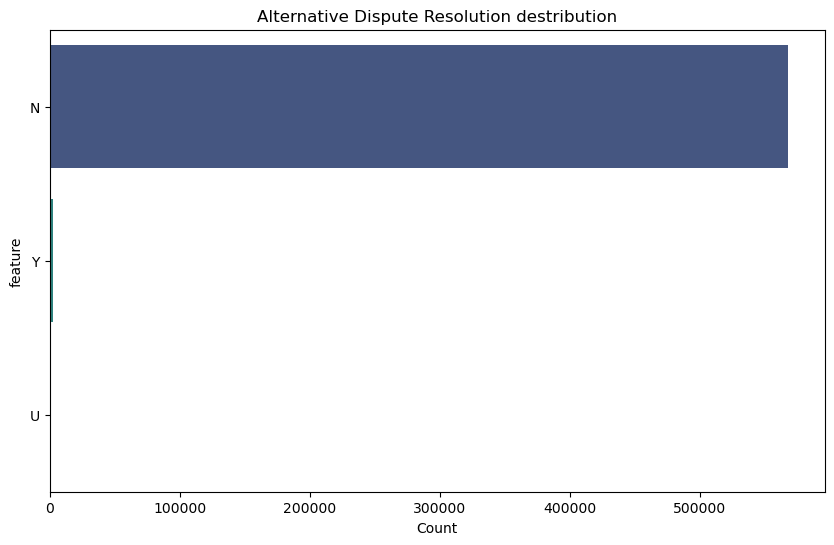

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


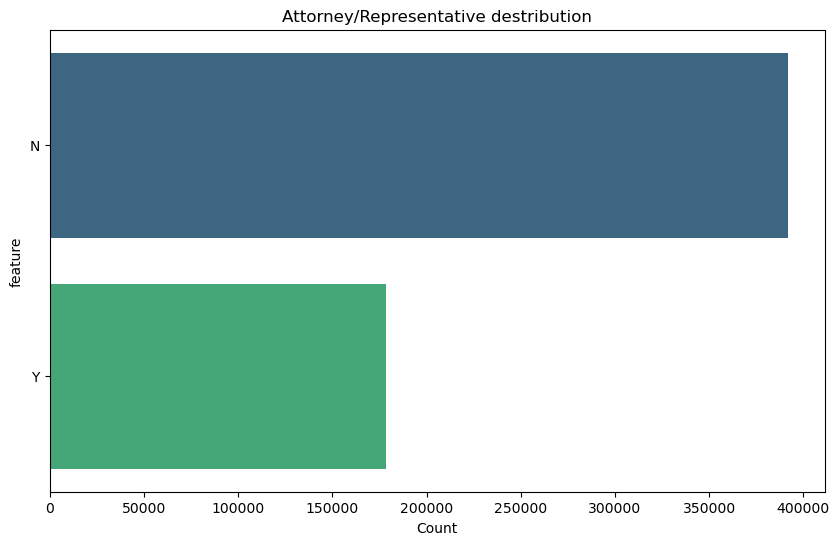

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


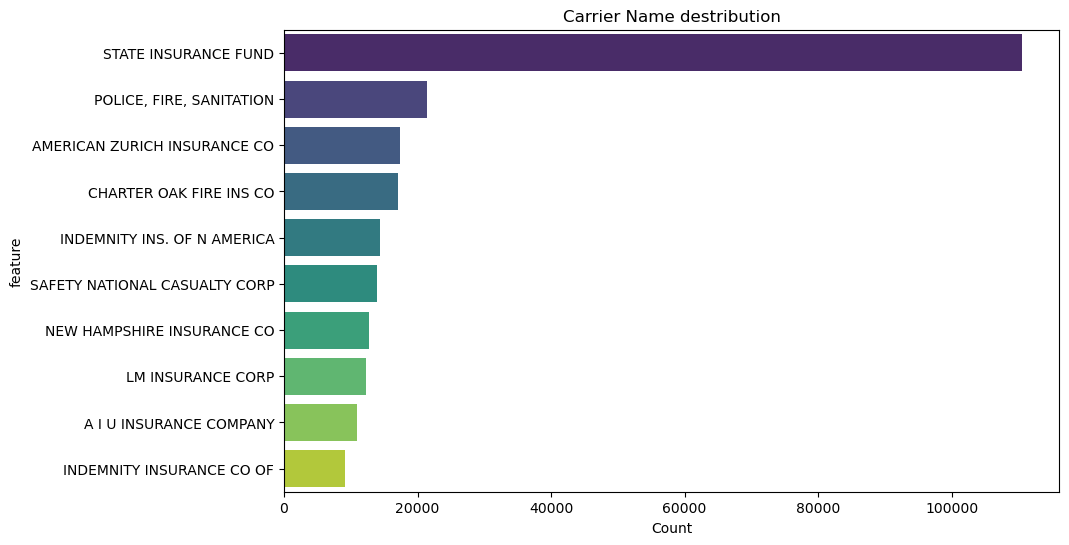

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


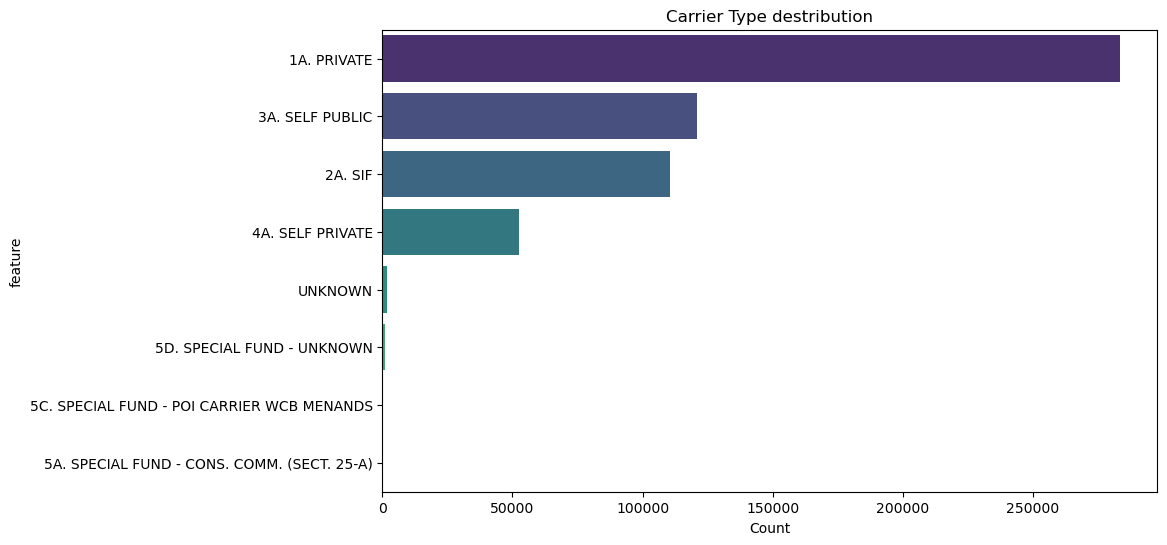

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


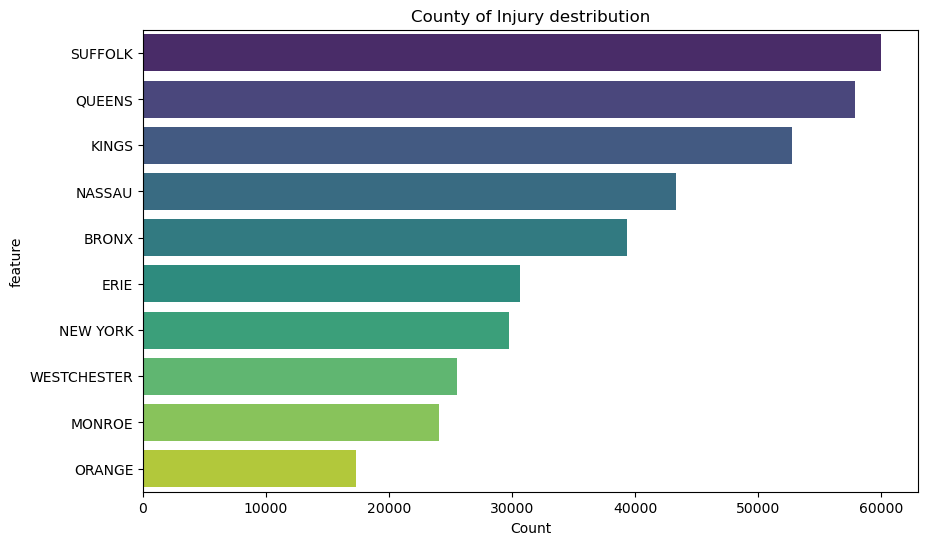

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


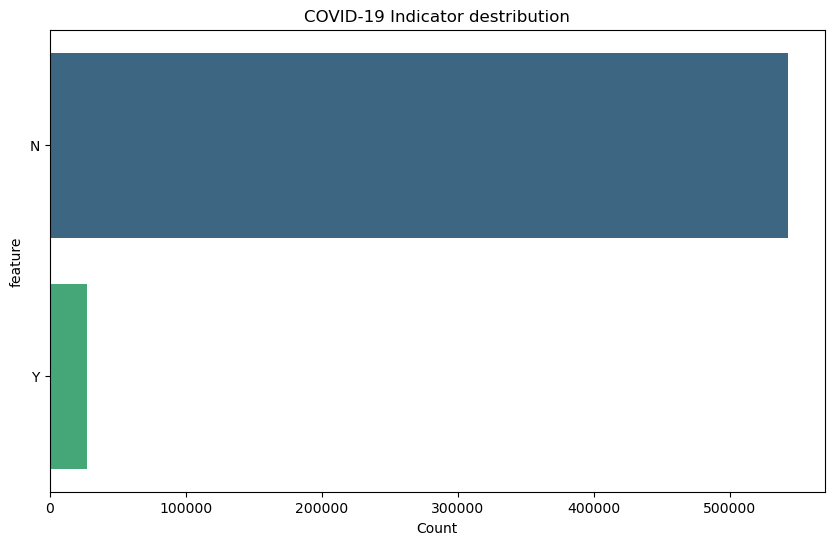

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


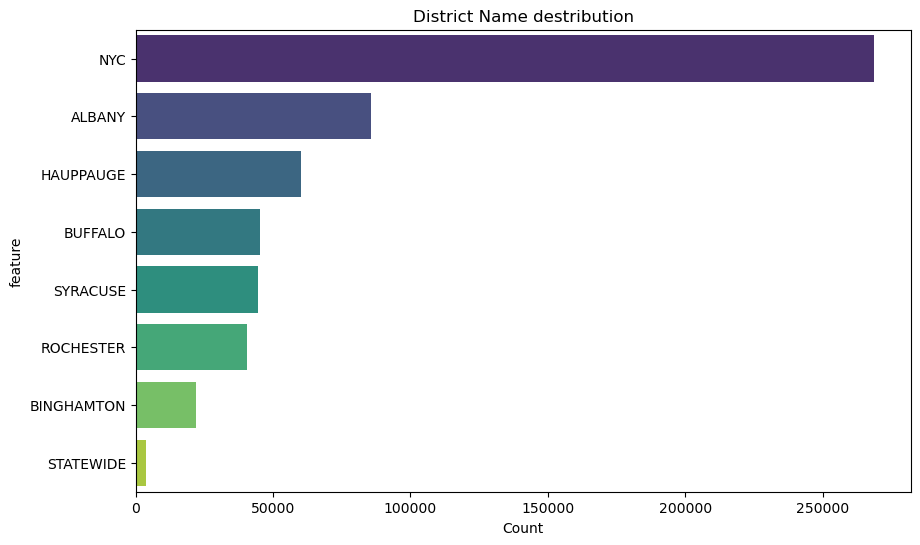

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


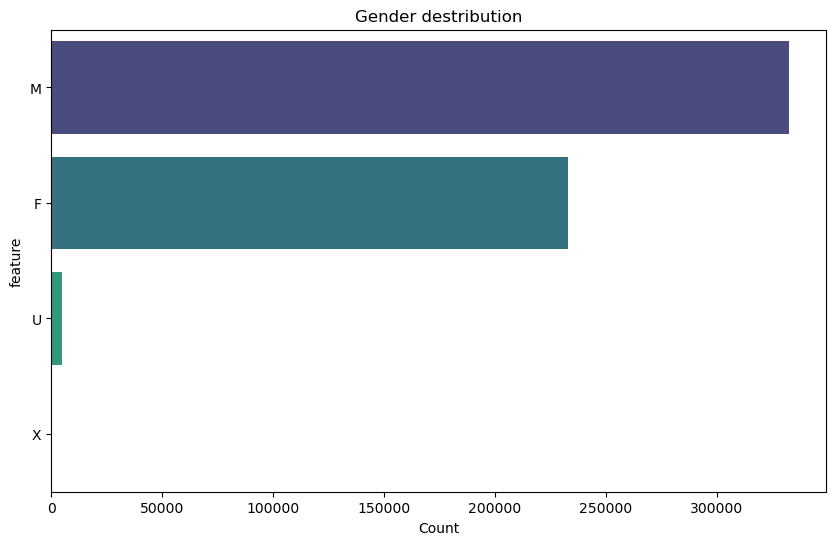

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


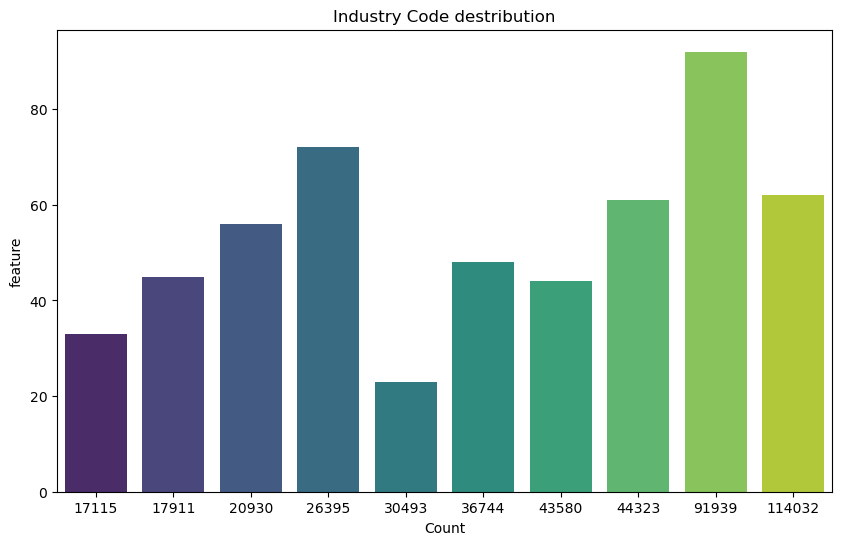

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


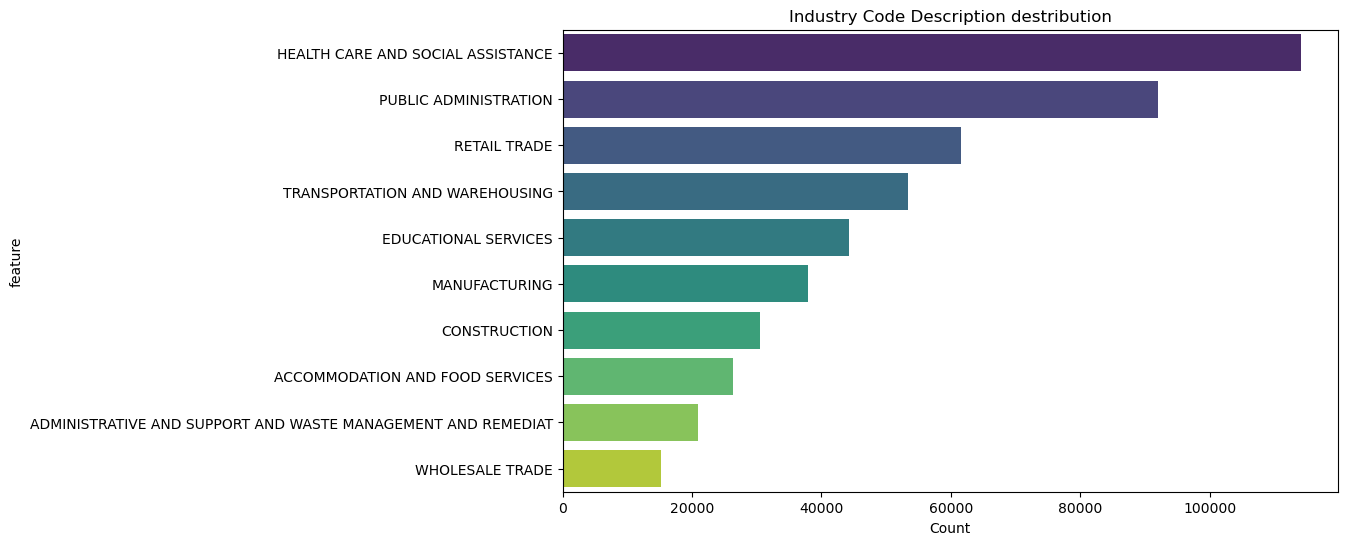

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


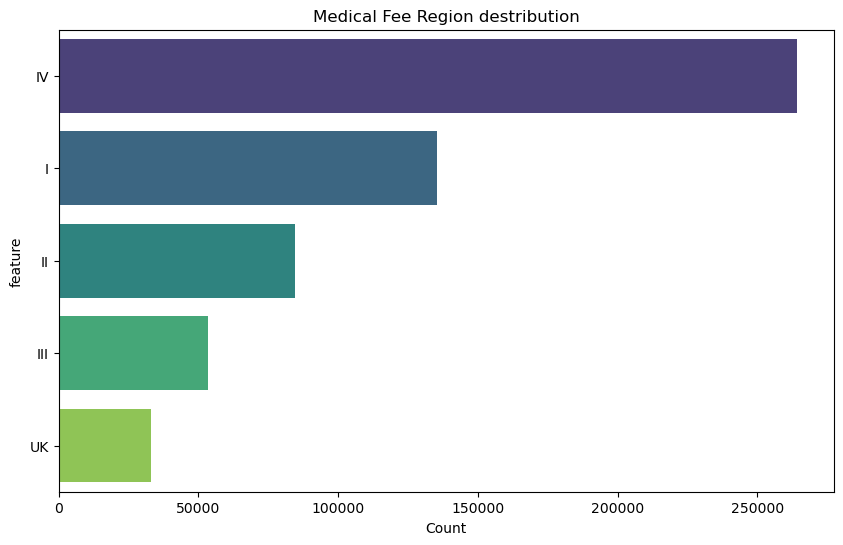

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


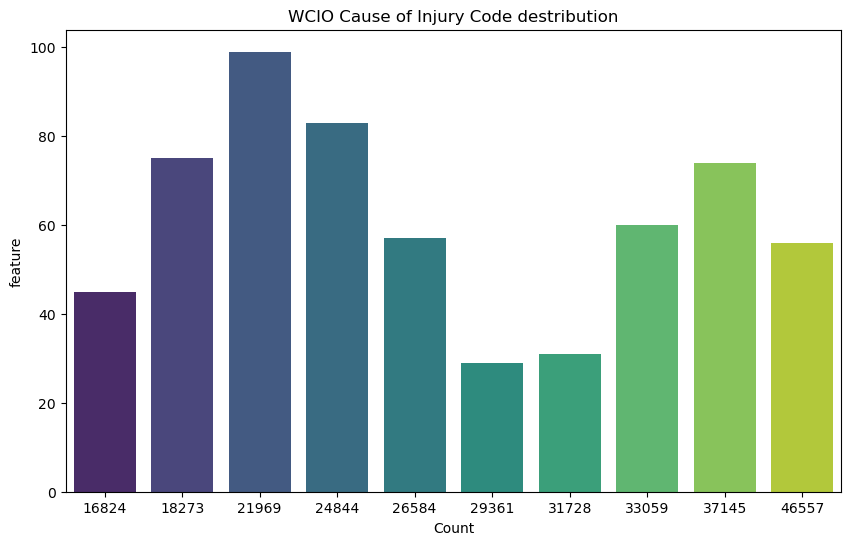

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


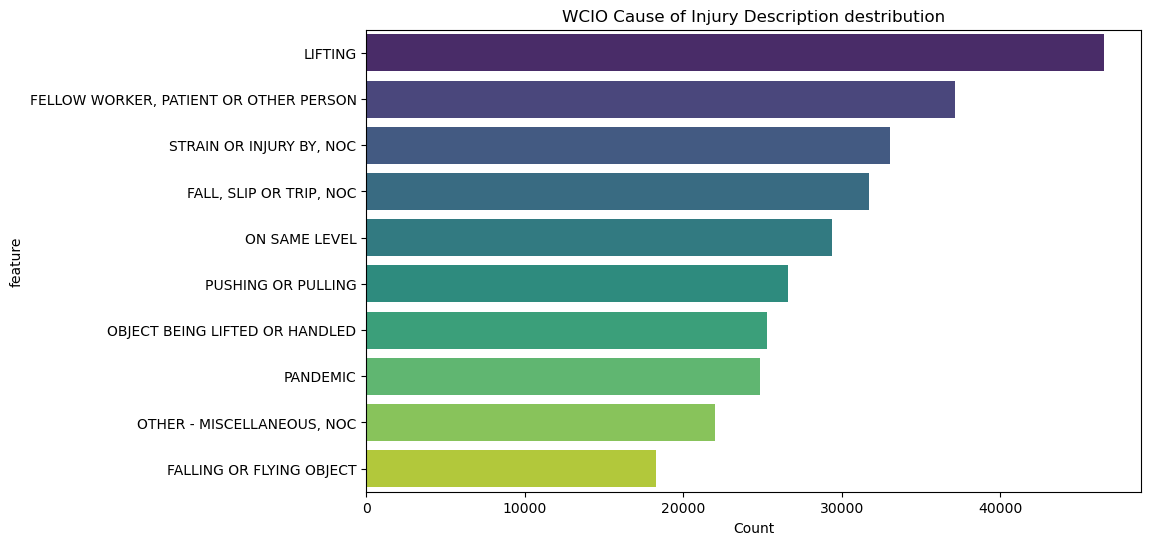

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


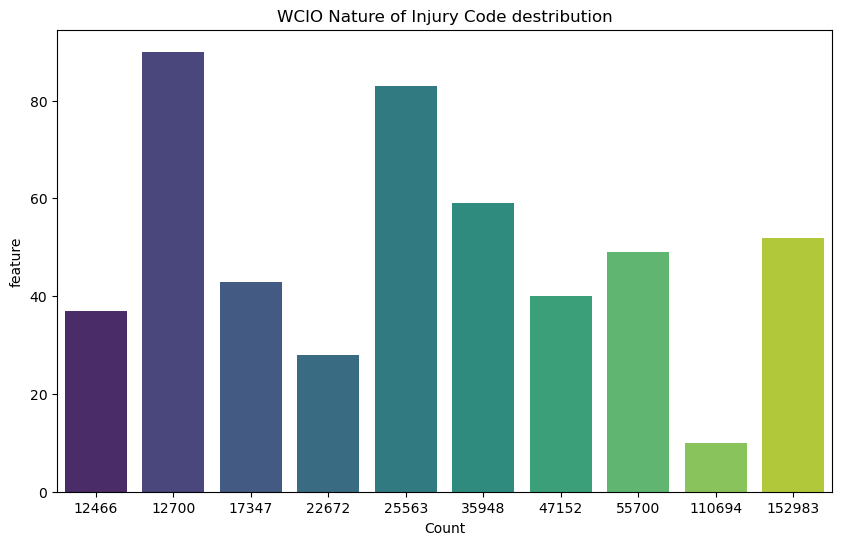

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


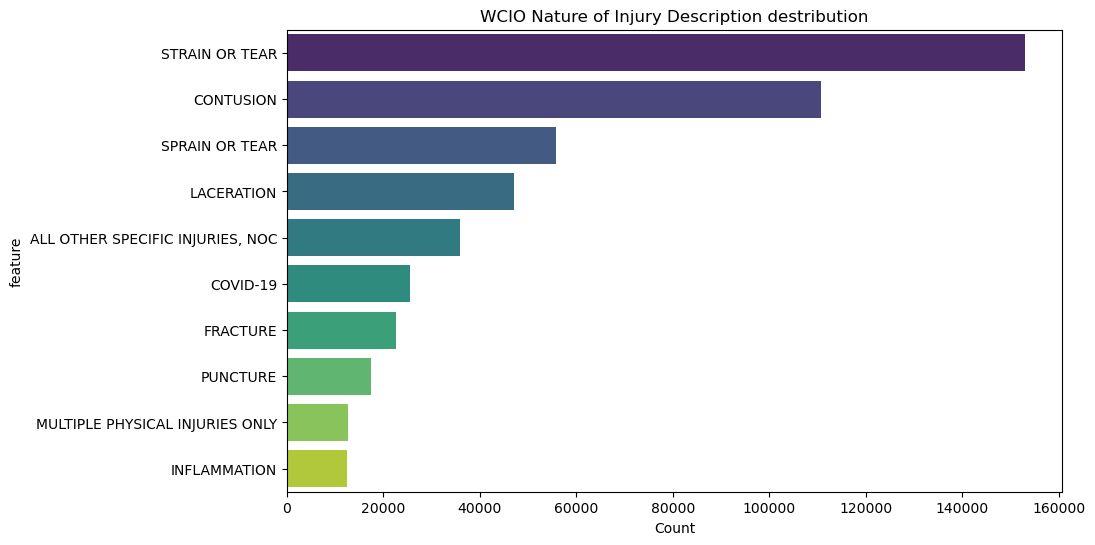

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


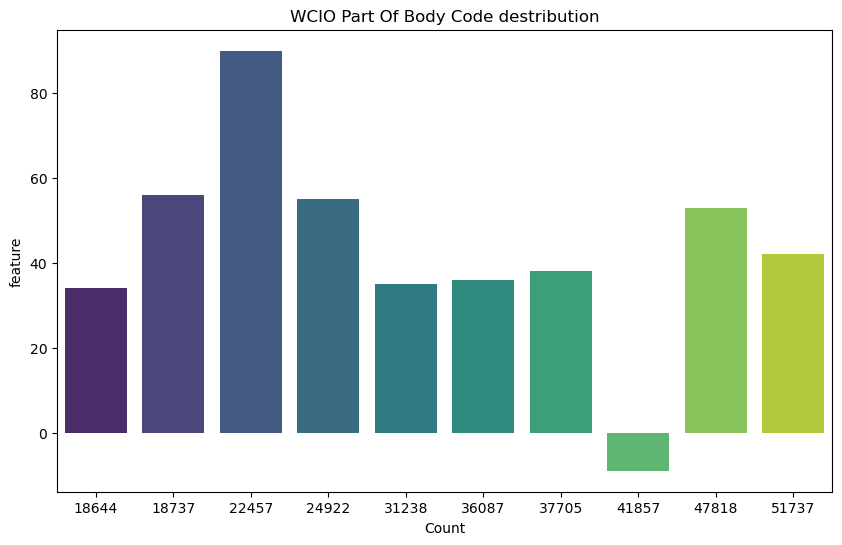

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


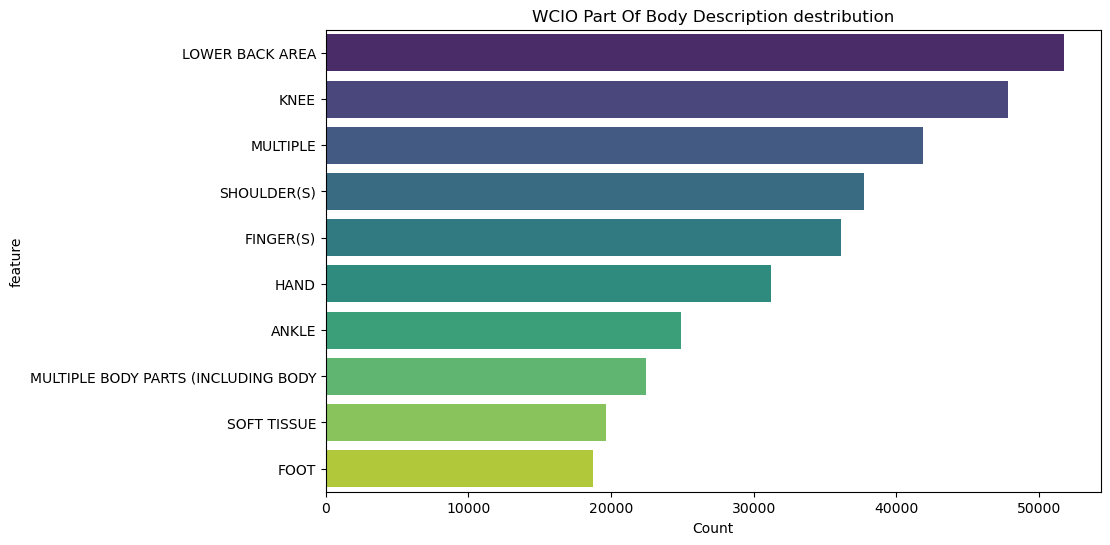

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


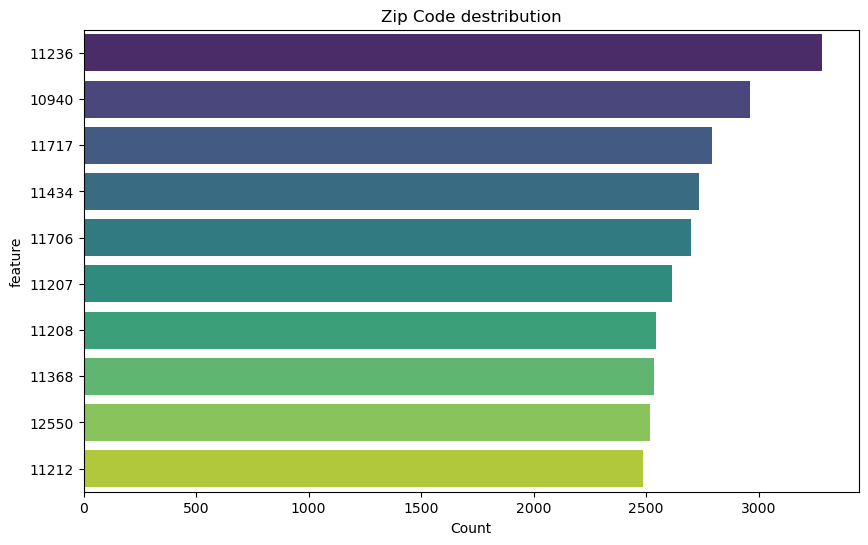

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


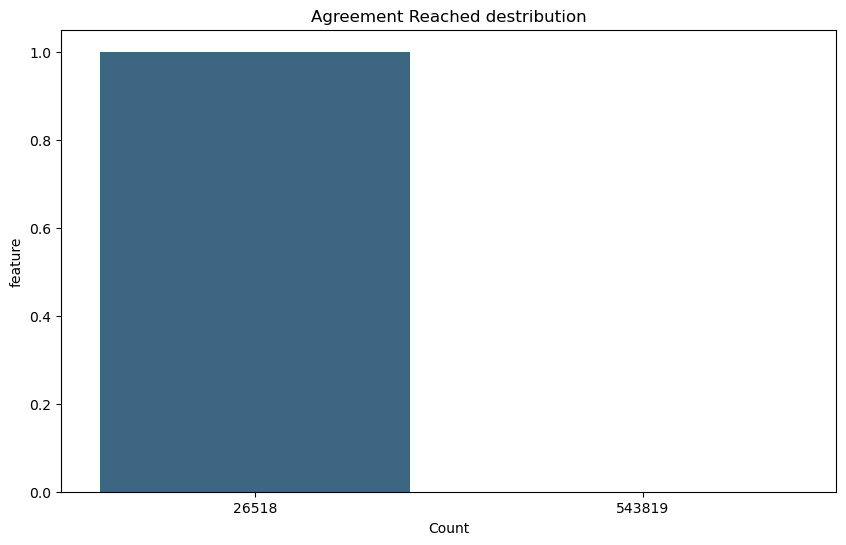

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


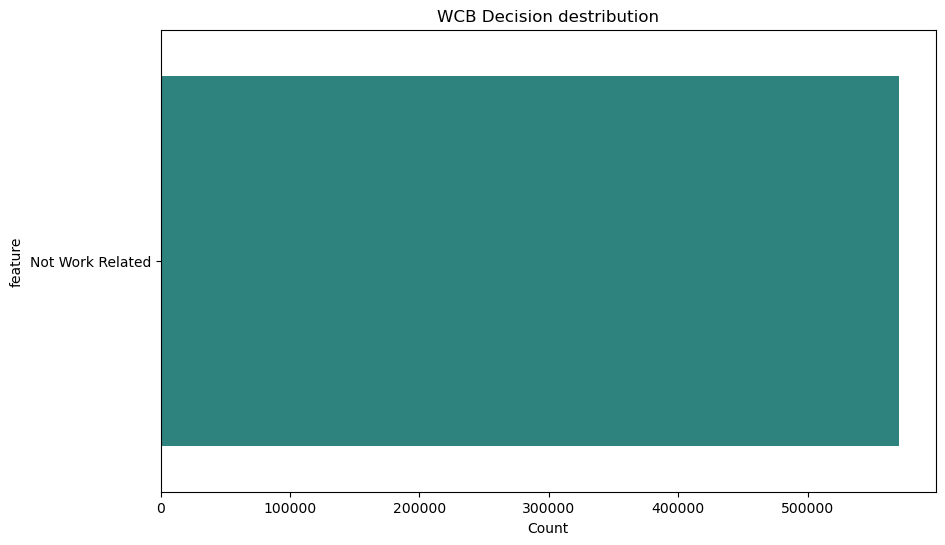

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/937145179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


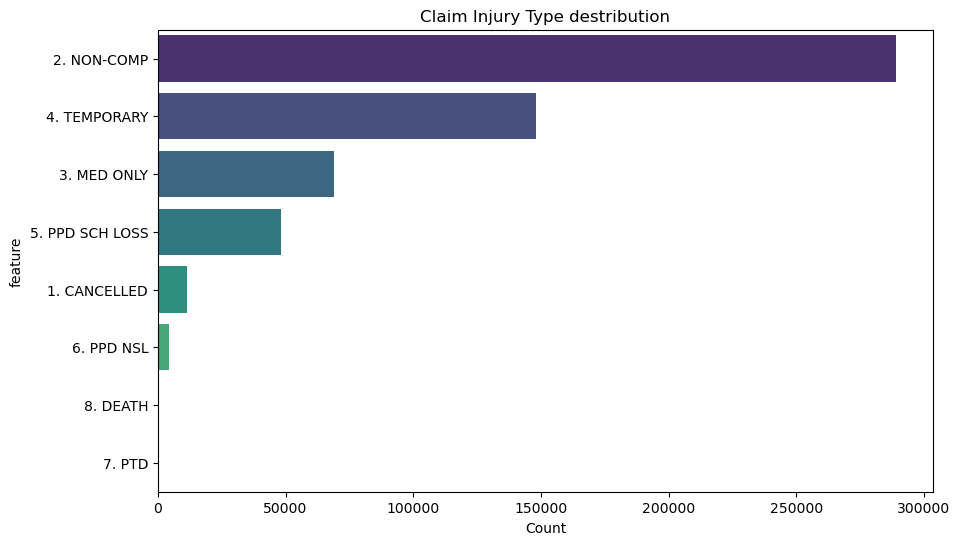

In [1528]:
# Plot bar charts individually for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    # Plot only the top 10 categories for readability
    top_categories = df[feature].value_counts().nlargest(10)
    sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
    plt.title(f'{feature} destribution')
    plt.xlabel('Count')
    plt.ylabel('feature')
    plt.show()

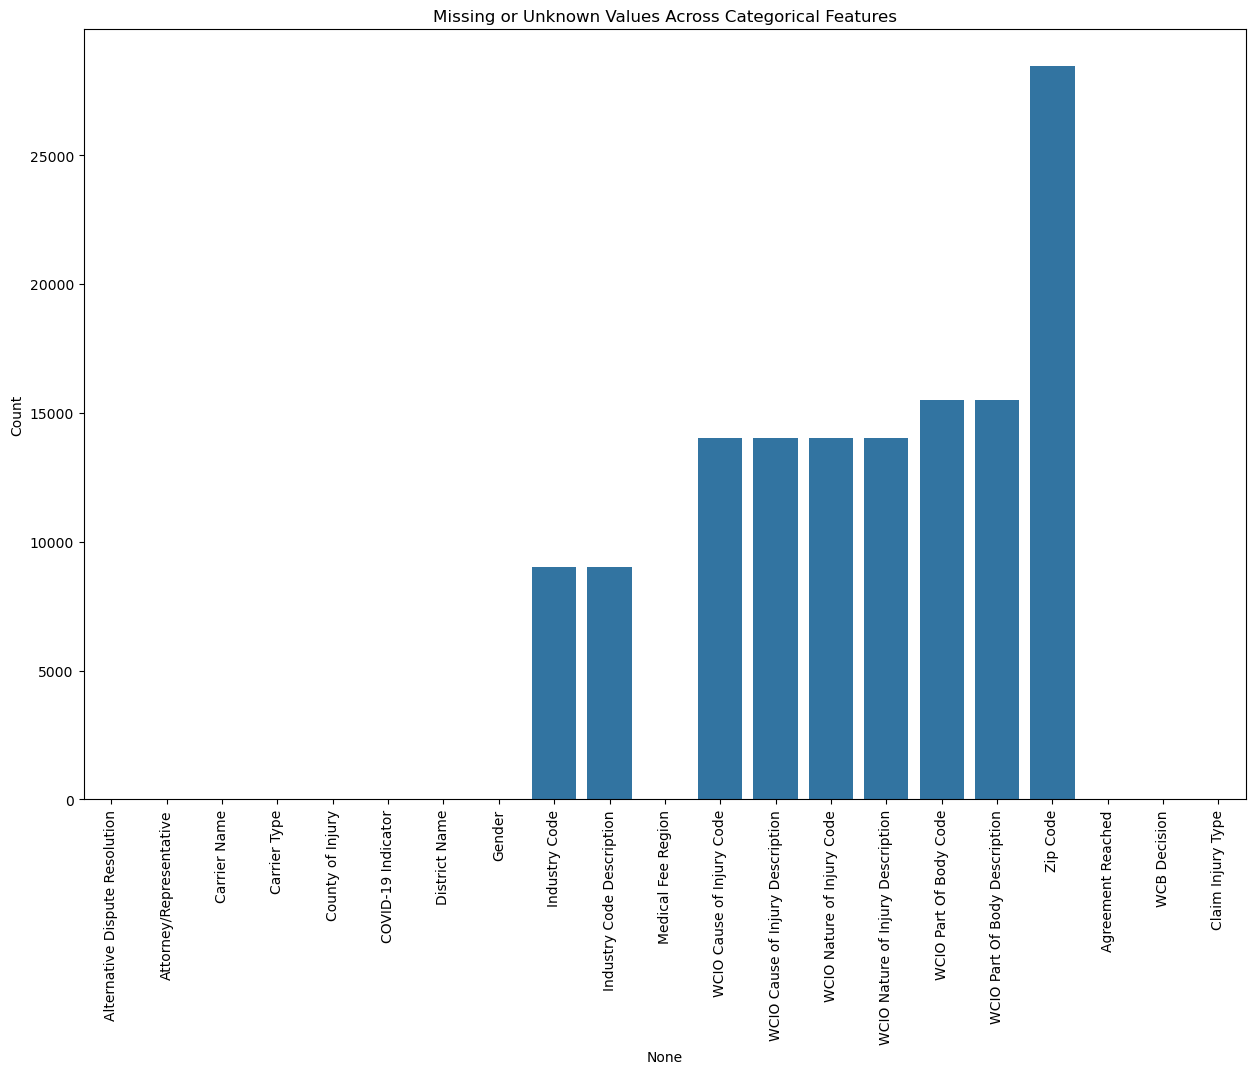

In [1529]:
plt.figure(figsize=(15, 10))
missing_counts = df[categorical_features].apply(lambda x: (x.isnull() | (x == 'Unknown') | (x == 'N/A')).sum())
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=90)
plt.title('Missing or Unknown Values Across Categorical Features')
plt.ylabel('Count')
plt.show()

#### <span style="color:salmon"> 2.7 Date Variables </span> 

In [1531]:
date_features = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

In [1532]:
date_df = df[date_features]
date_df

,Accident Date,Assembly Date,C-2 Date,C-3 Date,First Hearing Date
Claim Identifier,,,,,
5393875,2019-12-30,2020-01-01,2019-12-31,NaT,NaT
5393091,2019-08-30,2020-01-01,2020-01-01,2020-01-14,2020-02-21
5393889,2019-12-06,2020-01-01,2020-01-01,NaT,NaT
5393887,2019-12-30,2020-01-01,2019-12-31,NaT,NaT
5393863,2019-12-26,2020-01-01,2019-12-31,NaT,NaT
...,...,...,...,...,...
6165265,2022-12-14,2022-12-30,2022-12-30,NaT,NaT
6165285,2022-12-15,2022-12-31,2022-12-31,NaT,NaT
6165506,2022-12-13,2022-12-31,2022-12-31,NaT,NaT


## <span style="color:salmon"> 3. Clean and pre-processing  </span> 

#### <span style="color:salmon"> 3.1 Data Types </span> 

To see the types of each columns of the dataset

In [1536]:
df.dtypes

Accident Date                        datetime64[ns]
Age at Injury                                 Int64
Alternative Dispute Resolution               object
Assembly Date                        datetime64[ns]
Attorney/Representative                      object
Average Weekly Wage                         float64
Birth Year                                    Int64
C-2 Date                             datetime64[ns]
C-3 Date                             datetime64[ns]
Carrier Name                                 object
Carrier Type                                 object
Claim Injury Type                            object
County of Injury                             object
COVID-19 Indicator                           object
District Name                                object
First Hearing Date                   datetime64[ns]
Gender                                       object
IME-4 Count                                   Int64
Industry Code                                 Int64
Industry Cod

Above, it can be seen that the dates are considered objects while they should be considered dates. Additionally, the variables hat are codes should be considered strings not floats.

*Change date columns data type:*

In [1539]:
# Select date columns
date_cols = df.columns[df.columns.str.contains('Date')]
# Transform into date using pandas
df[date_cols] = df[date_cols].apply(pd.to_datetime)

*Change code columns to strings:*

In [1541]:
# Select code columns
code_cols = df.columns[df.columns.str.contains('Code')]
# Transform code columns to float
df[code_cols] = df[code_cols].astype('str')

Also, the data type of the column "Age at Injury" and "Birth Year" is float, and we have to change to int

In [1543]:
df['Birth Year'] = pd.to_numeric(df['Birth Year'], errors='coerce').astype('Int64')

df['Age at Injury'] = pd.to_numeric(df['Age at Injury'], errors='coerce').astype('Int64')

The column "Agreement Reached" is represented as 0 or 1, and we have to change to boolean

In [1545]:
# colocar a coluna Agreement Reached como boolean
df['Agreement Reached'] = df['Agreement Reached'].astype(bool)

In [1546]:
### ver se acabam .0
## "column" % 10

#### <span style="color:salmon">  3.2 Incoherencies </span> 
#### <span style="color:yellow"> ACABAR </span> 

1. There is some "Birth date" equal to 0. This values should became NAN values.

In [1549]:
df['Birth Year'] = df['Birth Year'].replace(0, np.nan)

2. "Person Age" shoud be greather than "Age at injury"

In [1551]:
df['Birth Year'] = 2022 - df['Birth Year']

In [1552]:
df[df['Age at Injury'] > df['Birth Year']]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5651750,2023-08-23,62,N,2021-02-05,Y,1848.00,61,2022-03-23,2021-01-26,"CNY OTHER THAN ED, HED WATER",...,99,"OTHER - MISCELLANEOUS, NOC",59,"ALL OTHER SPECIFIC INJURIES, NOC",13,EAR(S),nan,False,Not Work Related,4
5716543,2023-01-06,34,N,2021-05-07,Y,2500.00,33,2023-02-22,2021-05-04,"CNY OTHER THAN ED, HED WATER",...,97,REPETITIVE MOTION,52,STRAIN OR TEAR,-9,MULTIPLE,10309,False,Not Work Related,6
5919352,2023-09-11,59,N,2022-02-10,Y,0.00,58,2022-03-05,2022-02-03,CHARTER OAK FIRE INS CO,...,98,"CUMULATIVE, NOC",80,"ALL OTHER CUMULATIVE INJURY, NOC",-9,MULTIPLE,11379,False,Not Work Related,0
5980329,2023-09-06,49,N,2022-05-03,Y,0.00,48,2022-05-03,2022-05-16,NY MUNICIPAL WC ALLIANCE,...,98,"CUMULATIVE, NOC",80,"ALL OTHER CUMULATIVE INJURY, NOC",42,LOWER BACK AREA,10705,False,Not Work Related,6
5985232,2023-05-05,39,N,2022-05-06,N,0.00,38,2022-05-06,NaT,BOCES DUTCHESS COUNTY,...,74,"FELLOW WORKER, PATIENT OR OTHER PERSON",10,CONTUSION,14,EYE(S),12538,False,Not Work Related,2
6041297,2023-05-24,50,N,2022-07-21,Y,0.00,49,2022-08-01,2022-07-13,CONSOLIDATED EDISON CO OF NY,...,97,REPETITIVE MOTION,78,CARPAL TUNNEL SYNDROME,39,WRIST (S) & HAND(S),11550,False,Not Work Related,0
6052753,2023-02-07,37,N,2022-08-03,Y,1586.64,36,2022-08-03,NaT,STATE INSURANCE FUND,...,98,"CUMULATIVE, NOC",52,STRAIN OR TEAR,-9,MULTIPLE,13502,False,Not Work Related,2
6059336,2023-08-07,36,N,2022-08-11,N,NaN,35,2022-08-11,NaT,STATE INSURANCE FUND,...,74,"FELLOW WORKER, PATIENT OR OTHER PERSON",10,CONTUSION,-9,MULTIPLE,14020,False,Not Work Related,5
6073571,2023-07-20,64,N,2022-08-31,Y,0.00,63,2023-04-18,2022-08-29,ARCH INDEMNITY INSURANCE CO.,...,97,REPETITIVE MOTION,71,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",53,KNEE,11575,False,Not Work Related,3


3. The min Age at injury shoudn´t be equal to 0

In [1554]:
df['Age at Injury'] = df['Age at Injury'].replace(0, np.nan)

4. Average Weekly Wage shouldn´t be eaqual to 0 in min

In [1556]:
df['Average Weekly Wage'] = df['Average Weekly Wage'].replace(0, np.nan)

#### <span style="color:salmon"> 3.3 Handling Missing Values </span> 
#### <span style="color:yellow"> Inputation with median, mode </span> 

#### <span style="color:salmon"> 3.4 Removing Outliers </span> 
#### <span style="color:yellow"> To do </span> 

### <span style="color:salmon"> 3.5 Numerical Variables </span> 

In this next subsection, we are going to verify how our changes afted the data starting by the numerical variables.

1. In order to look for relationships between descriptive variables, we create a correlation matriz

##### <span style="color:yellow"> VER OS VALORES </span> 

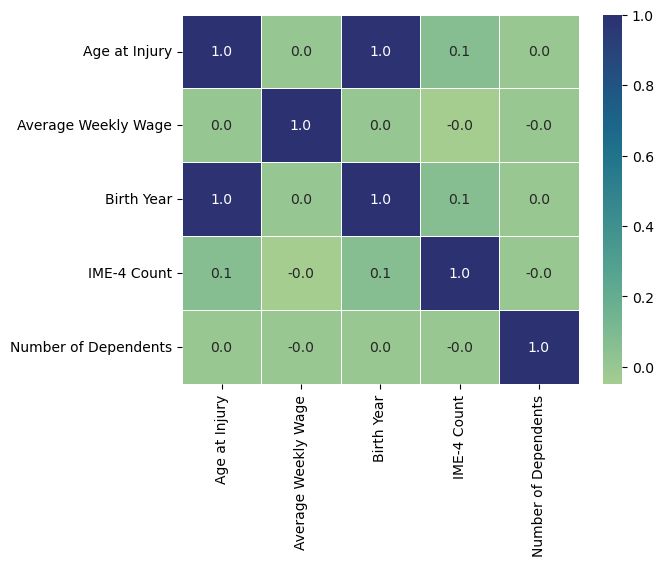

In [1562]:
correlation_matrix = numerical_df = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidth=.5, cmap="crest")
plt.show()

### <span style="color:salmon"> 3.6 Categorical Variables </span> 

The next step involves cleaning and transforming the categorical data.

**Handling unknown values in categorical variables**

*Modifying `Alternative Dispute Resolution`*

Before making any alterations, we decided to check the 5 cases with `U` in the variable `Alternative Disputer Resolution`.

In [1567]:
df[df['Alternative Dispute Resolution'] == 'U'].T

Claim Identifier,5582402,6032724,6034607,6108701,6108690
Accident Date,2018-03-12 00:00:00,2021-11-05 00:00:00,2022-07-06 00:00:00,2022-09-01 00:00:00,2022-08-29 00:00:00
Age at Injury,57,56,52,57,55
Alternative Dispute Resolution,U,U,U,U,U
Assembly Date,2020-10-21 00:00:00,2022-07-11 00:00:00,2022-07-13 00:00:00,2022-10-17 00:00:00,2022-10-17 00:00:00
Attorney/Representative,N,N,Y,N,N
Average Weekly Wage,NaN,NaN,NaN,NaN,NaN
Birth Year,61,57,53,57,55
C-2 Date,NaT,NaT,NaT,NaT,NaT
C-3 Date,NaT,NaT,2023-03-09 00:00:00,NaT,NaT
Carrier Name,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS


Above, we can see that we have no data about the injury itself, so we decided to drop these rows.

In [1569]:
# Drop rows where 'Alternative Dispute Resolution' is 'U'
df = df[df['Alternative Dispute Resolution'] != 'U']

*Carrier Name*

In [1571]:
top_keywords = (
    df['Carrier Name']
    .str.split(expand=True)              # Split the carrier names into separate words
    .stack()                              # Stack into a single column
    .reset_index(drop=True)              # Reset index to clean up the DataFrame
    .str.replace(r',', '', regex=True)   # Remove commas
    .str.replace(r'\.', '', regex=True)   # Remove periods
    .str.replace(r'\bOF\b', '', regex=True)  # Drop "OF" words
    .str.replace(r'&', '', regex=True)    # Drop "&" symbols 
    .str.replace(r'\bINS\b', 'INSURANCE', regex=True)  # Replace "INS" with "INSURANCE"
    .str.replace(r'\bCO\b', 'COMPANY', regex=True)  
    .str.replace(r'\bCORP\b', 'CORPORATION', regex=True) 
    .str.strip()                         # Remove leading/trailing whitespace
)

# Get top 30 keywords, excluding empty strings
top_15_keywords = top_keywords[top_keywords != ''].value_counts().head(15)

# Display the result
print(top_15_keywords)


INSURANCE      332921
COMPANY        198366
STATE          112597
FUND           112073
INDEMNITY       55716
FIRE            48104
CORPORATION     43607
AMERICAN        34409
CASUALTY        30721
NEW             26331
NATIONAL        24694
ZURICH          22364
AMERICA         22115
INC             21771
POLICE          21497
Name: count, dtype: int64


### <span style="color:yellow"> Create binary variables with carrier name type? </span> 

Modifying *`Carrier Type`*

In the `Carrier Type` column, there are three values that are similar which represent different types of special funds. Only 9 special funds could be identified, leaving 1023 unkown. As such, we decided to join all of them in the unkown special funds.

In [1574]:
df['Carrier Type'] = df['Carrier Type'].replace({'5C. SPECIAL FUND - POI CARRIER WCB MENANDS': '5D. SPECIAL FUND - UNKNOWN'})
df['Carrier Type'] = df['Carrier Type'].replace({'5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': '5D. SPECIAL FUND - UNKNOWN'})

*Modifying `Gender`*

In the `Gender` column, we replaced the values `U` and `X` with `Unknown`. The value `U` typically indicates "unknown" or unspecified gender, while `X` may signify a non-binary identity. By combining these two values into `Unknown`, we simplify the data, making it easier to analyze and interpret.

In [1576]:
# Replace 'U' with 'Unknown'
df['Gender'] = df['Gender'].replace({'U': 'Unknown'})
# Replace 'X' with 'Unknown'
df['Gender'] = df['Gender'].replace({'X': 'Unknown'})

### <span style="color:salmon"> 3.6.1 Encoding Variables </span> 

To use the categorical variables, it is necessary to encode them as most models do not accept non-numerical values.

### <span style="color:yellow"> Do markdown </span> 

*Alternative Dispute Resolution*

In [1581]:
enc_adr = OneHotEncoder(sparse_output = False, drop='first')
df['Alternative Dispute Resolution'] = enc_adr.fit_transform(df[['Alternative Dispute Resolution']]).astype(int)

*Attorney/Representative*

In [1583]:
enc_ar = OneHotEncoder(sparse_output = False, drop='first')
df['Attorney/Representative'] = enc_ar.fit_transform(df[['Attorney/Representative']]).astype(int)

*Carrier Type*

In [1585]:
categories = [['UNKNOWN'] + sorted([cat for cat in df['Carrier Type'].unique() if cat != 'UNKNOWN'])]
enc_ct = OrdinalEncoder(categories=categories)
df['Carrier Type'] = enc_ct.fit_transform(df[['Carrier Type']]).astype(int)


*County of Injury*

In [1587]:
# find_duplicate_frequencies_and_map(df, 'County of Injury')

In [1588]:
# Calculate frequency for each category
freq_county = df['County of Injury'].value_counts(normalize=True)

# Map categories to frequency values
df['Enc County of Injury'] = df['County of Injury'].map(freq_county)

*COVID-19 Indicator*

In [1590]:
enc_covid = OneHotEncoder(sparse_output = False, drop='first')
df['COVID-19 Indicator'] = enc_covid.fit_transform(df[['COVID-19 Indicator']]).astype(int)

*District Name*

In [1592]:
# find_duplicate_frequencies_and_map(df, 'District Name')

In [1593]:
# Calculate frequency for each category
freq_district = df['District Name'].value_counts(normalize=True)

# Map categories to frequency values
df['Enc District Name'] = df['District Name'].map(freq_district)

*Gender*

In [1595]:
enc_gender = OneHotEncoder(sparse_output=False, drop=None)
# Perform one-hot encoding
encoded_gender = enc_gender.fit_transform(df[['Gender']])
# Convert the array back to a DataFrame with aligned index
encoded_gender_df = pd.DataFrame(encoded_gender, columns=enc_gender.get_feature_names_out(['Gender']), index=df.index)
# Concatenate the original DataFrame with the new one-hot encoded DataFrame
df = pd.concat([df, encoded_gender_df], axis=1)

df = df.drop('Gender_Unknown', axis=1)

*Industry Code*

In [1597]:
# find_duplicate_frequencies_and_map(df, 'Industry Code')

In [1598]:
# Calculate frequency for each category
freq_industry = df['Industry Code'].value_counts(normalize=True)

# Map categories to frequency values
df['Enc Industry Code'] = df['Industry Code'].map(freq_industry)

*Medical Fee Region*

In [1600]:
enc_med_fee_reg = OneHotEncoder(sparse_output=False, drop=None)
# Perform one-hot encoding
encoded_med_fee_reg = enc_med_fee_reg.fit_transform(df[['Medical Fee Region']])
# Convert the array back to a DataFrame with aligned index
encoded_med_fee_reg_df = pd.DataFrame(encoded_med_fee_reg, columns=enc_med_fee_reg.get_feature_names_out(['Medical Fee Region']), index=df.index)
# Concatenate the original DataFrame with the new one-hot encoded DataFrame
df = pd.concat([df, encoded_med_fee_reg_df], axis=1)

df = df.drop('Medical Fee Region_UK', axis=1)

*WCIO Cause of Injury Code*

In [1602]:
# find_duplicate_frequencies_and_map(df, 'WCIO Cause of Injury Code')

*WCIO Nature of Injury Code*

In [1604]:
# find_duplicate_frequencies_and_map(df, 'WCIO Nature of Injury Code')

*WCIO Part of Body Code*

In [1606]:
# find_duplicate_frequencies_and_map(df, 'WCIO Part Of Body Code')

*Zip Code*

In [1608]:
# find_duplicate_frequencies_and_map(df, 'Zip Code')

*Agreement Reached*

In [1610]:
enc_agreement_reached = OneHotEncoder(sparse_output = False, drop='first')
df['Enc Agreement Reached'] = enc_agreement_reached.fit_transform(df[['Agreement Reached']]).astype(int)

*Claim Injury Type* - Target

In [1612]:
categories = sorted(cat for cat in df['Claim Injury Type'].unique())

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(categories)

# Encode the target variable ('Claim Injury Type')
df['Claim Injury Type Encoded'] = label_encoder.transform(df['Claim Injury Type'])

In [1613]:
# For interpretation Only: Carrier Name, County of Injury, District Name, Gender, Industry Coded, Industry Code description, 
# See what to do: WCB Decision

## <span style="color:salmon"> 4. Feature Engineering </span> 

1. Creating New Features<br>
2. Encoding Categorical Variables<br>
3. Scaling and Normalizing<br>
4. Transforming Features<br>

## Handling Missing Values(Tahiya) Maria, you can use those for missing value

**Copy the original file to work with feature engineering part**

In [1618]:
feature_df_copy = df

In [1619]:
# Calculate the percentage of null values per column
# Mean calculates the propotion
null_percentage = feature_df_copy.isnull().mean() * 100

# Convert the result to a DataFrame for better readability
null_percentage_df = null_percentage.reset_index()
null_percentage_df.columns = ['Column', 'Null Percentage']

print(null_percentage_df) # Before making decisions, check which variables can have na following the project description

                               Column  Null Percentage
0                       Accident Date         0.000000
1                       Age at Injury         0.311222
2      Alternative Dispute Resolution         0.000000
3                       Assembly Date         0.000000
4             Attorney/Representative         0.000000
5                 Average Weekly Wage        63.208272
6                          Birth Year         4.340104
7                            C-2 Date         2.276919
8                            C-3 Date        67.773683
9                        Carrier Name         0.000000
10                       Carrier Type         0.000000
11                  Claim Injury Type         0.000000
12                   County of Injury         0.000000
13                 COVID-19 Indicator         0.000000
14                      District Name         0.000000
15                 First Hearing Date        73.814024
16                             Gender         0.000000
17        

In [1620]:
feature_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570332 entries, 5393875 to 6165075
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570332 non-null  datetime64[ns]
 1   Age at Injury                      568557 non-null  Int64         
 2   Alternative Dispute Resolution     570332 non-null  int64         
 3   Assembly Date                      570332 non-null  datetime64[ns]
 4   Attorney/Representative            570332 non-null  int64         
 5   Average Weekly Wage                209835 non-null  float64       
 6   Birth Year                         545579 non-null  Int64         
 7   C-2 Date                           557346 non-null  datetime64[ns]
 8   C-3 Date                           183797 non-null  datetime64[ns]
 9   Carrier Name                       570332 non-null  object        
 10  Carrier Type      

In [1621]:
feature_df_copy['Average Weekly Wage'].fillna(feature_df_copy['Average Weekly Wage'].median(), inplace=True)
feature_df_copy['IME-4 Count'].fillna(0, inplace=True)  # Assume 0 where no count is provided

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/3003801139.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feature_df_copy['Average Weekly Wage'].fillna(feature_df_copy['Average Weekly Wage'].median(), inplace=True)
/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/3003801139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because

**Fill missing value in Accident Date column**<br>
__`Forward Fill`__
Since the missing values percentage is only 0.64%, forward filling can handle it without the need to drop rows.

In [1623]:
feature_df_copy['Accident Date'].fillna(method='ffill', inplace=True)

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/154647279.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feature_df_copy['Accident Date'].fillna(method='ffill', inplace=True)
/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/154647279.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  feature_df_copy['Accident Date'].fillna(method='ffill', inplace=True)


**Fill missing value in `C-2 Date` column**<br>
__`Fill with Most Frequent Value (Mode)`__
Since the column primarily uses specific dates, filling missing values with the most common date (mode) is a good option. 
This keeps the data consistent with the majority pattern without introducing arbitrary values.

In [1625]:
# Filling with the most frequent date
most_frequent_date = feature_df_copy['C-2 Date'].mode()[0]
feature_df_copy['C-2 Date'].fillna(most_frequent_date, inplace=True)

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/631634653.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feature_df_copy['C-2 Date'].fillna(most_frequent_date, inplace=True)


**Fill missing value in `First Hearing Date` column**<br>
__Impute Based on Related Columns__
There have a column `Accident Date` that effectively setting a default `First Hearing Date` that is 30 days after the `Accident Date`,
but only for rows where the "First Hearing Date" is missing (null or NaN).

In [1627]:
# Assuming hearings generally occur 30 days after the accident date for missing values
feature_df_copy['First Hearing Date'] = feature_df_copy['First Hearing Date'].fillna(
    feature_df_copy['Accident Date'] + pd.Timedelta(days=30)
)

Fill missing value in `WCIO Cause of Injury Description`, `WCIO Nature of Injury Description` and `WCIO Part Of Body Description`  columns<br>
__Impute with "Unknown"__

In [1629]:
feature_df_copy['WCIO Cause of Injury Description'].fillna('Unknown', inplace=True)
feature_df_copy['WCIO Nature of Injury Description'].fillna('Unknown', inplace=True)
feature_df_copy['WCIO Part Of Body Description'].fillna('Unknown', inplace=True)

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/3401279354.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feature_df_copy['WCIO Cause of Injury Description'].fillna('Unknown', inplace=True)
/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/3401279354.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object 

For the `Age at Injury` column, which has a low missing value percentage (approximately 0.95%), so, replace missing values with the median age. This is a straightforward approach when the percentage of missing values is low and the data is normally distributed.

In [1631]:
median_age = feature_df_copy['Age at Injury'].median()
feature_df_copy['Age at Injury'].fillna(median_age, inplace=True)

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/2696838297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feature_df_copy['Age at Injury'].fillna(median_age, inplace=True)


For the `Birth Year`, fill the missing value with median()

In [1633]:
median_birth_year = feature_df_copy['Birth Year'].median()
feature_df_copy['Birth Year'].fillna(median_birth_year, inplace=True)

/var/folders/_s/_rkc5yf52mjg60_cwkkrw5yc0000gn/T/ipykernel_33917/1781311836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feature_df_copy['Birth Year'].fillna(median_birth_year, inplace=True)


## Feature Engineering

#### <span style="color:salmon">__`Step 1 `__ Date Features </span>
Dates can hold a lot of valuable information. We can extract components like year, month, and day of the week, which may capture seasonality or trends.<br><br>
For the date columns:<br>
__1. Year, Month, Day:__ These could provide insights on seasonality.<br>
__2. Day of Week:__ Useful for identifying patterns on specific days.<br>
__3. Time Differences:__ Calculating time spans between dates can be useful for tracking progress or delays in cases.

In [1636]:
# Extracting year, month, and day
for col in ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']:
    feature_df_copy[f'{col}_Year'] = feature_df_copy[col].dt.year
    feature_df_copy[f'{col}_Month'] = feature_df_copy[col].dt.month
    feature_df_copy[f'{col}_Day'] = feature_df_copy[col].dt.day
    feature_df_copy[f'{col}_DayOfWeek'] = feature_df_copy[col].dt.dayofweek

**Calculate Time Differences:**<br>
Create new columns to capture the elapsed time between key dates, which can help understand delays or the timeline of events.

In [1638]:
# Calculate the time difference between relevant dates
feature_df_copy['Days_to_First_Hearing'] = (feature_df_copy['First Hearing Date'] - feature_df_copy['Accident Date']).dt.days
feature_df_copy['Days_to_C2'] = (feature_df_copy['C-2 Date'] - feature_df_copy['Accident Date']).dt.days
feature_df_copy['Days_to_C3'] = (feature_df_copy['C-3 Date'] - feature_df_copy['Accident Date']).dt.days

#### <span style="color:salmon">__`Step 2 `__ Numerical Features </span>
Numerical features may benefit from transformations to reduce skewness or enhance interpretability.

`2.1` **Age at Injury**

In [1641]:
feature_df_copy['Age at Injury'].describe()

count     570332.0
mean     42.517269
std      13.689646
min            1.0
25%           31.0
50%           42.0
75%           54.0
max          117.0
Name: Age at Injury, dtype: Float64

__1. Binning:__ Group ages into categories like "young" or "senior" if such categories might capture different risk profiles.<br>
__2. Outlier Treatment:__ Cap extreme values that may be erroneous or too infrequent.

In [1643]:
age_bins = [0, 25, 40, 55, 70, 100]
age_labels = ['Young', 'Mid-Age', 'Experienced', 'Senior', 'Elderly']
feature_df_copy['Age_Group'] = pd.cut(feature_df_copy['Age at Injury'], bins=age_bins, labels=age_labels)

# Cap Age at Injury at 100 to handle potential outliers
feature_df_copy['Age at Injury'] = np.where(feature_df_copy['Age at Injury'] > 100, 100, feature_df_copy['Age at Injury'])

`2.2` **Average Weekly Wage**

Relative Wage Compared to Median Wage:<br>
Calculate whether the injured worker’s wage is above or below the median wage for the dataset, it's potentially reflecting job type or socioeconomic factors.

In [1646]:
median_wage = feature_df_copy['Average Weekly Wage'].median()
feature_df_copy['Relative_Wage'] = np.where(feature_df_copy['Average Weekly Wage'] > median_wage, 'Above Median', 'Below Median')

#### <span style="color:salmon">__`Step 3 `__ Categorical Features </span>

`3.1` __Gender__

In [1649]:
# Label Encoding
# Label Encoding assigns integer values to each category. Here, we'll use a simple mapping.
feature_df_copy['Gender_Label'] = feature_df_copy['Gender'].map({'M': 0, 'F': 1, 'Unknown': 2})

`3.2` __High Cardinality Features (e.g., Carrier Name, Industry Code)__<br>
Use frequency encoding for high-cardinality categorical variables.

In [1651]:
# Frequency encoding example for Carrier Name
feature_df_copy['Carrier_Name_Freq'] = feature_df_copy['Carrier Name'].map(feature_df_copy['Carrier Name'].value_counts(normalize=True))
feature_df_copy['Industry Code_Freq'] = feature_df_copy['Industry Code'].map(feature_df_copy['Industry Code'].value_counts(normalize=True))

#### <span style="color:salmon">__`Step 4 `__ Binary Features </span>
Binary columns can often be used as-is but need to be converted to 0 or 1 if they aren’t already.

In [1654]:
# Convert Agreement Reached to binary values if necessary
feature_df_copy['Agreement Reached'] = feature_df_copy['Agreement Reached'].astype(int)

#### <span style="color:salmon">__`Step 5 `__ Textual Data </span>
Text fields can sometimes contain important keywords that add predictive power. A simple way to start is with keyword extraction.

In [1656]:
# Check if "Injury" is mentioned in WCIO Cause of Injury Description
feature_df_copy['Contains_Injury'] = feature_df_copy['WCIO Cause of Injury Description'].str.contains('Injury', case=False).astype(int)

#### <span style="color:salmon">__`Step 6 `__ Special Indicators </span>
Interaction terms can be valuable, especially when a special indicator like COVID-19 might affect 
outcomes differently depending on age or gender.

In [1658]:
# Example of interaction between COVID-19 Indicator and Age
feature_df_copy['COVID_Age_Interaction'] = feature_df_copy['COVID-19 Indicator'] * feature_df_copy['Age at Injury']


__Purpose of This Interaction Feature__
The new column, COVID_Age_Interaction, essentially captures the age only when COVID-19 Indicator is 1. If the COVID-19 Indicator is 0, it sets the value to 0, effectively filtering out the age information in non-COVID cases.

#### <span style="color:salmon">__`Step 7 `__ Geographic Features </span>

In [1661]:
# Extracting the first 3 digits of Zip Code to create a region identifier
feature_df_copy['Zip_Region'] = feature_df_copy['Zip Code'].astype(str).str[:3]

#### <span style="color:salmon">__`Step 8 `__ Seasonality of Accident Date </span>
Determine if the accident occurred during a specific season, which might be relevant if there are seasonal hazards.

In [1663]:
# Define a function get_season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

feature_df_copy['Accident_Season'] = feature_df_copy['Accident Date'].dt.month.apply(get_season)

#### <span style="color:salmon">__`Step 9 `__ Claim Type Grouping by Severity </span>
Group Claim Injury Type or other injury-related codes to classify injuries as "Minor", "Moderate", or "Severe".

In [1665]:
severity_map = {
    '2. NON-COMP': 'Minor',
    '4. TEMPORARY': 'Moderate',
    '3. MED ONLY': 'Minor',
    '5. PPD SCH LOSS': 'Severe',
    '6. PPD NSL': 'Severe',
    '1. CANCELLED': 'Minor',
    '8. DEATH': 'Severe',
    '7. PTD': 'Severe',
}
# Applying the map to create the Injury Severity column
feature_df_copy['Injury_Severity'] = feature_df_copy['Claim Injury Type'].map(severity_map).fillna('Unknown')

__Explanation of Severity Levels__<br>
`Minor:` Non-compensable claims, medical-only cases, or canceled claims that typically involve minimal or no compensation and likely minor injuries.<br>
`Moderate:` Temporary disabilities that imply some impact on work but are not permanent.<br>
`Severe:` Permanent disabilities, death, or any claims that have long-lasting or irreversible effects.

#### <span style="color:salmon">__`Step 10 `__ Dependent Indicator </span>
Flag cases where the injured worker has dependents, potentially affecting claim value and compensation.

In [1668]:
feature_df_copy['Has_Dependents'] = (feature_df_copy['Number of Dependents'] > 0).astype(int)

#### <span style="color:salmon">__`Step 11 `__ Accident Timing Indicator (Weekend or Holiday) </span>
Create a flag to indicate whether the accident happened on a weekend or during a public holiday, which might be a factor in accident patterns.

In [1670]:
# Step 1: Define a threshold to identify potential public holidays based on accident frequency
threshold = 10

# Step 2: Identify potential public holidays based on date frequency in the 'Accident Date' column
date_counts = feature_df_copy['Accident Date'].value_counts()
potential_holidays = date_counts[date_counts > threshold].index

# Convert the dates to string format for consistency
public_holidays = [date.strftime('%Y-%m-%d') for date in potential_holidays]
public_holidays = pd.to_datetime(public_holidays)  # Convert to datetime for comparison

# Step 3: Flag Weekends
feature_df_copy['Weekend_Accident'] = feature_df_copy['Accident Date'].dt.dayofweek.isin([5, 6]).astype(int)

# Step 4: Flag Public Holidays based on identified public_holidays
feature_df_copy['Holiday_Accident'] = feature_df_copy['Accident Date'].isin(public_holidays).astype(int)

__Explanation__<br>
`Count Occurrences:` value_counts() will show how many times each date appears in the "Accident Date" column.<br>
`Set Threshold:` Filter the dates that exceed a certain count threshold. For example, if a specific date has more than 10 accidents, might flag it as a potential public holiday.<br>
`List of Public Holidays:` This list of dates can then be used to create a holiday flag.

#### <span style="color:salmon">__`Step 12 `__ Medical Fee Region Encoding </span>


In [1673]:
# Ordinal Encoding, including 'UK' as a separate category
region_mapping = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'UK': 5}  # Assign a unique value for 'UK'
feature_df_copy['Medical Fee Region Encoded'] = feature_df_copy['Medical Fee Region'].map(region_mapping)

#### <span style="color:salmon">__`Step 12 `__ Scaling and Normalization </span>
It’s often beneficial to scale numerical features, especially for distance-based models or models sensitive to feature scales.

In [1675]:
# Standardizing numerical columns
scaler = StandardScaler()
feature_df_copy[['Age at Injury', 'Average Weekly Wage', 'IME-4 Count']] = scaler.fit_transform(feature_df_copy[['Age at Injury', 'Average Weekly Wage', 'IME-4 Count']])


`Final Check and Export`

__1. Verify Data Types and Missing Values:__

In [1678]:
print(feature_df_copy.info())
print(feature_df_copy.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 570332 entries, 5393875 to 6165075
Data columns (total 79 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570332 non-null  datetime64[ns]
 1   Age at Injury                      570332 non-null  float64       
 2   Alternative Dispute Resolution     570332 non-null  int64         
 3   Assembly Date                      570332 non-null  datetime64[ns]
 4   Attorney/Representative            570332 non-null  int64         
 5   Average Weekly Wage                570332 non-null  float64       
 6   Birth Year                         570332 non-null  Int64         
 7   C-2 Date                           570332 non-null  datetime64[ns]
 8   C-3 Date                           183797 non-null  datetime64[ns]
 9   Carrier Name                       570332 non-null  object        
 10  Carrier Type      

__2.Export the Processed Dataset:__
Save the engineered dataset for analysis or model training.

In [1680]:
# feature_df_copy.to_csv("processed_dataset.csv")

## <span style="color:salmon"> 4. Other Visualizations </span> 

### <span style="color:yellow"> Add visualizations with cleaned data </span> 

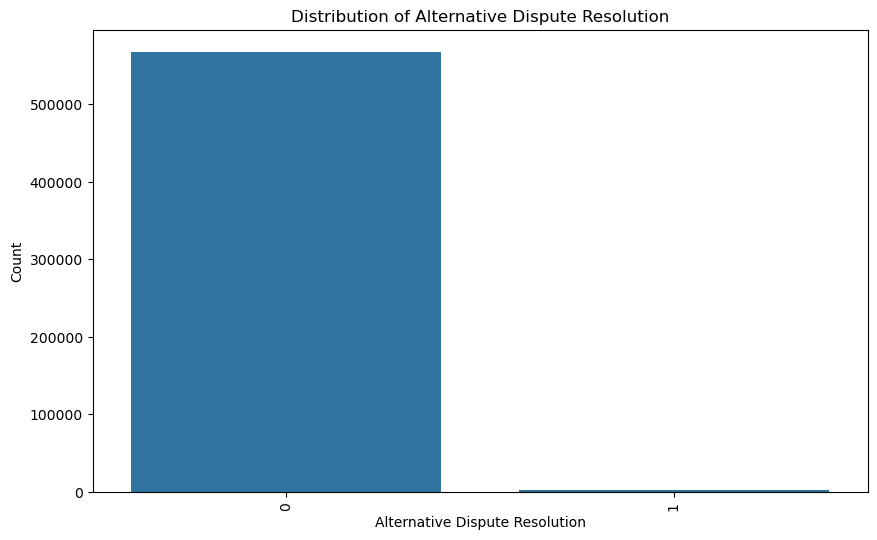

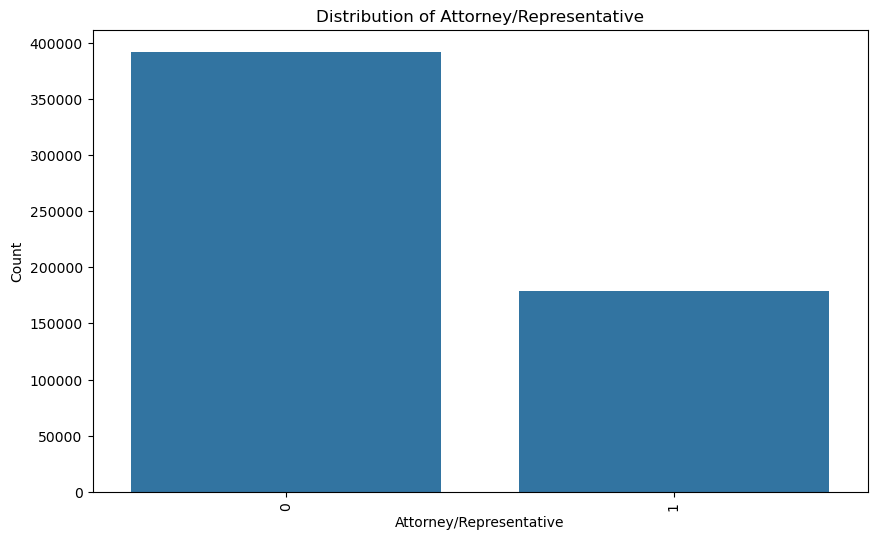

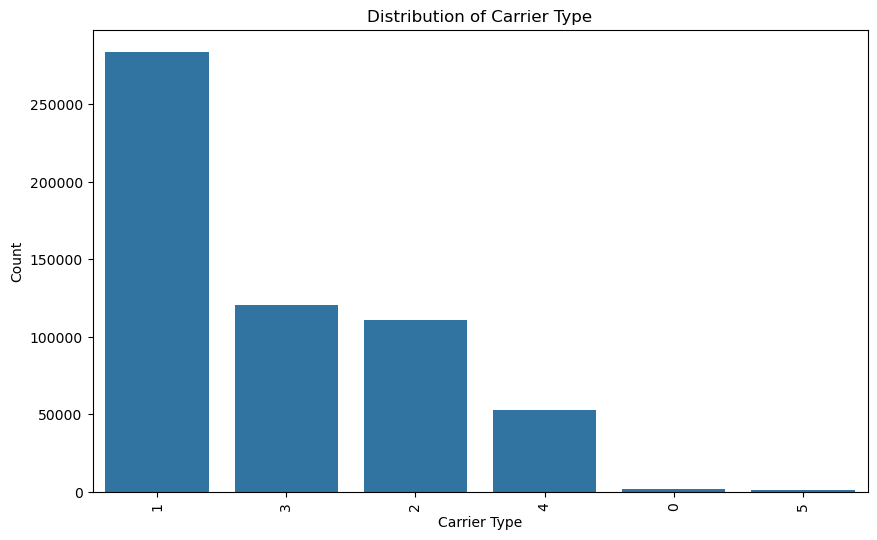

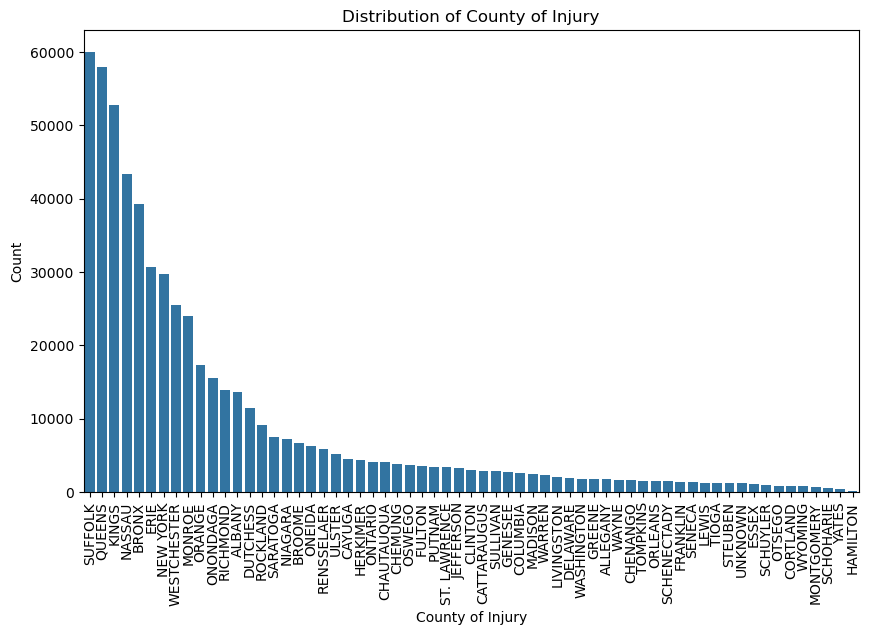

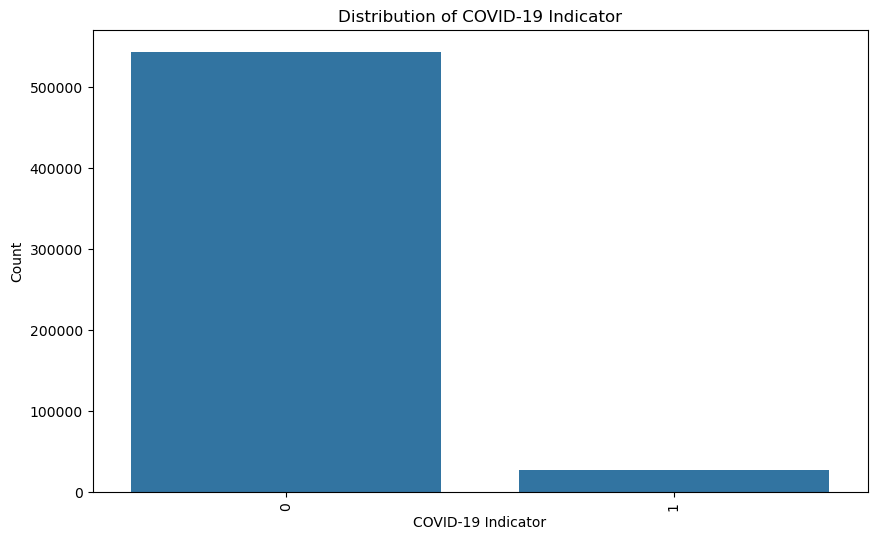

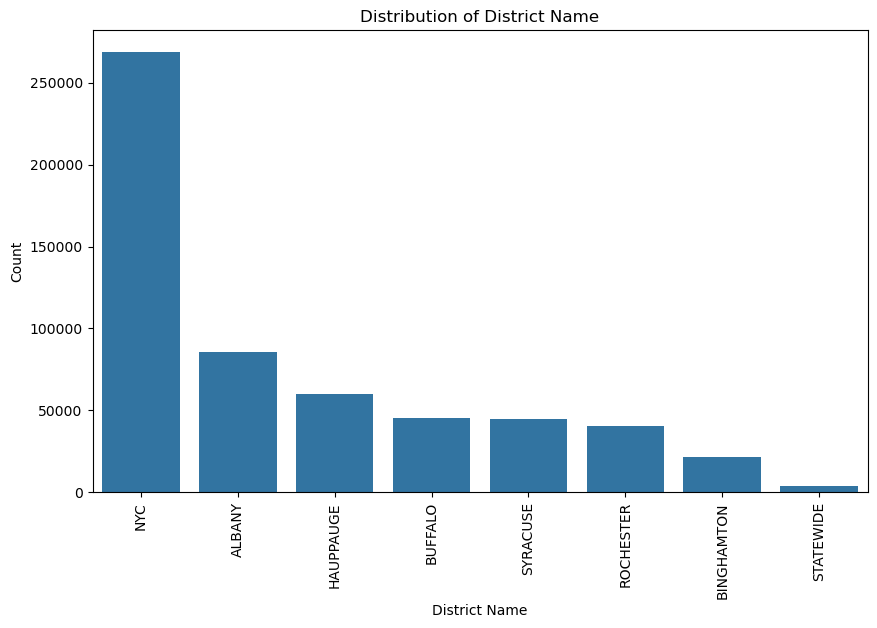

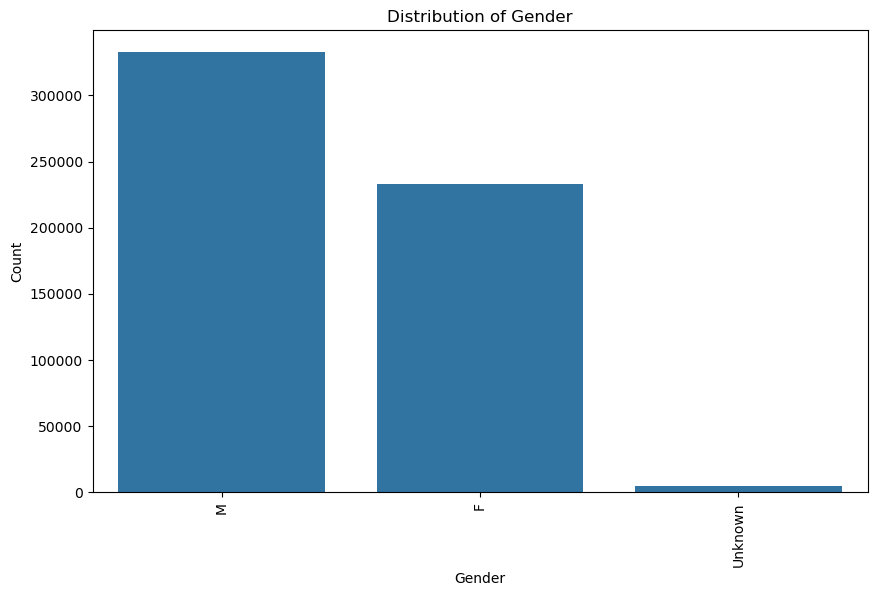

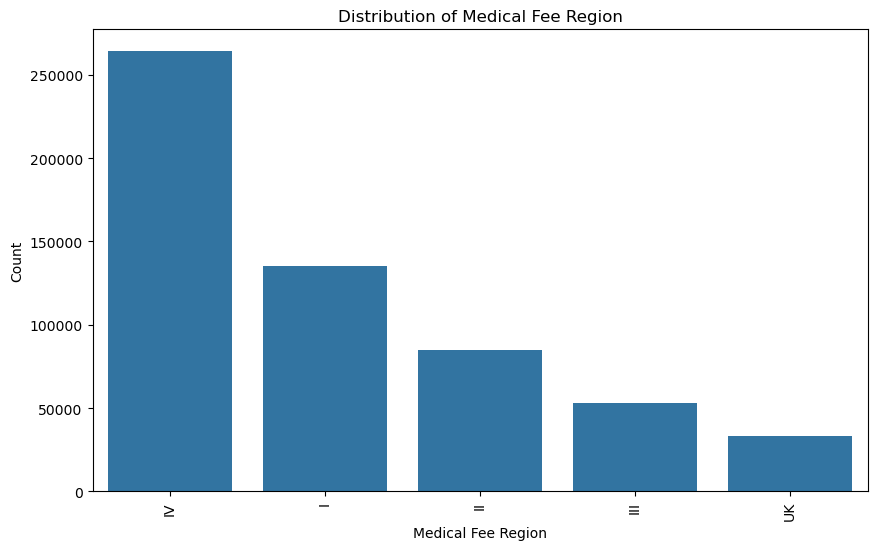

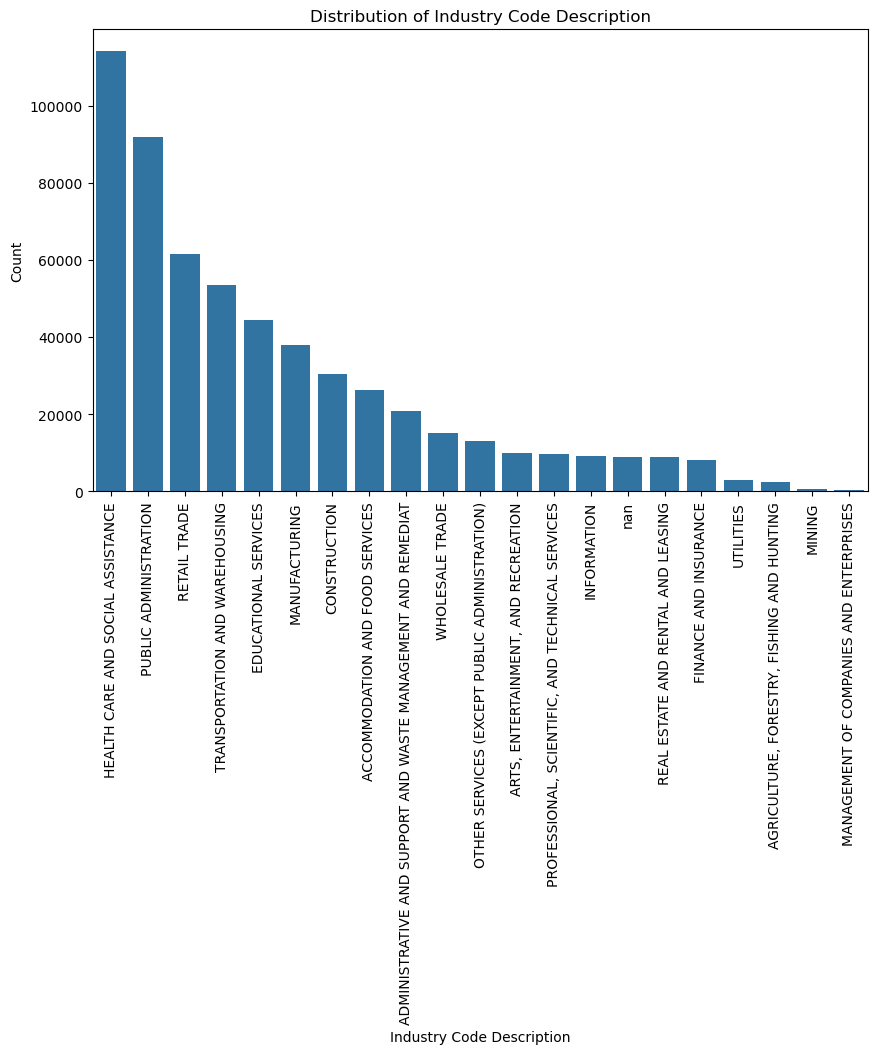

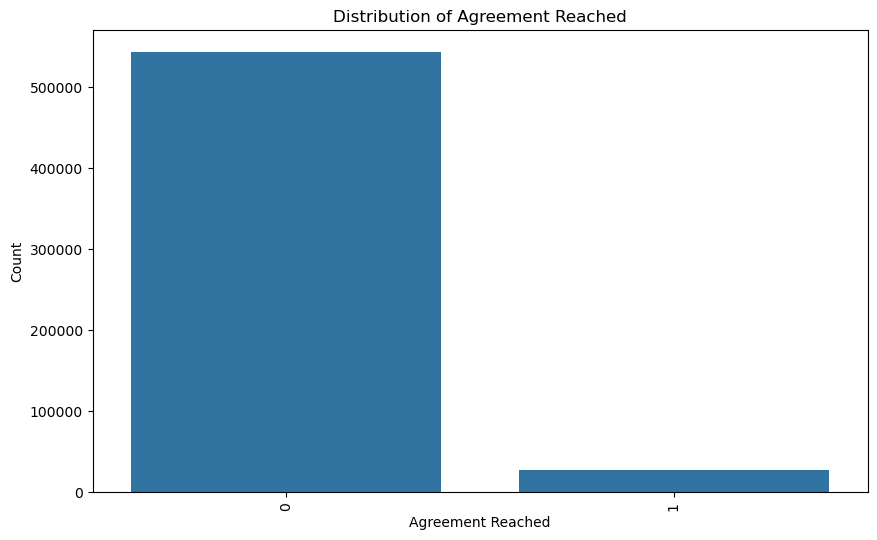

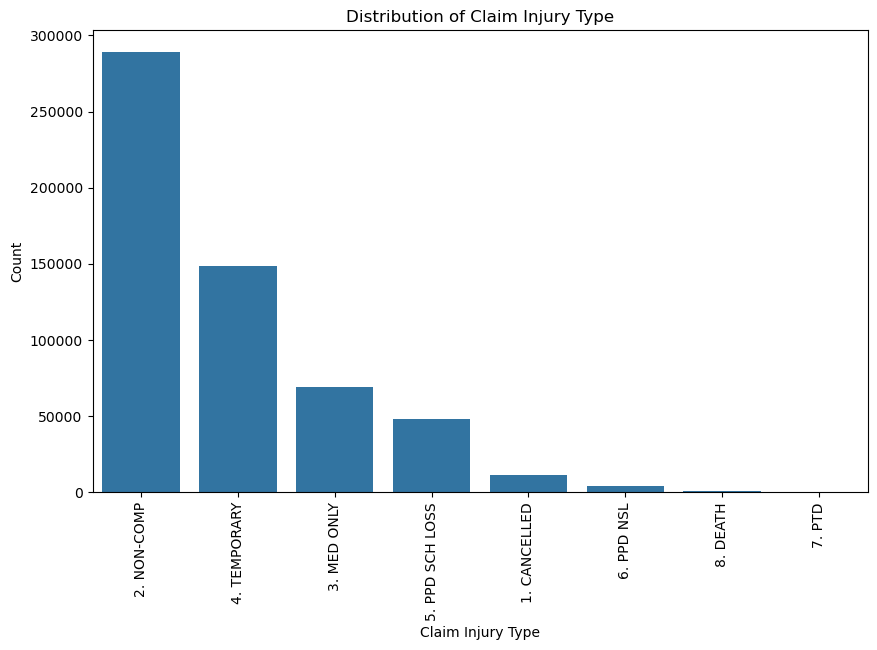

In [1683]:
selected_categorical_features = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
                     'District Name', 'Gender', 'Medical Fee Region', 'Industry Code Description', 'Agreement Reached', 'Claim Injury Type']

for feature in selected_categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature], order=df[feature].value_counts().index)  # x instead of y
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for readability
    plt.show()

## <span style="color:salmon"> 5. Feature Selection </span> 

### <span style="color:yellow"> Split the dataset, scale and then start feature selection </span> 

#### <span style="color:salmon"> 5.1 Chi-Squared Test  </span> 

In [1687]:
for var in categorical_df.columns:
    TestIndependence(df[var],df['Claim Injury Type'], var)

NameError: name 'TestIndependence' is not defined

## <span style="color:salmon"> 6. Export Dataset </span> 

### <span style="color:yellow"> Export clean dataset </span> 